In [ ]:
, import numpy as np
import pandas as pd
import os
#import the warnings.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
df = pd.read_csv('Heart_Disease_data.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


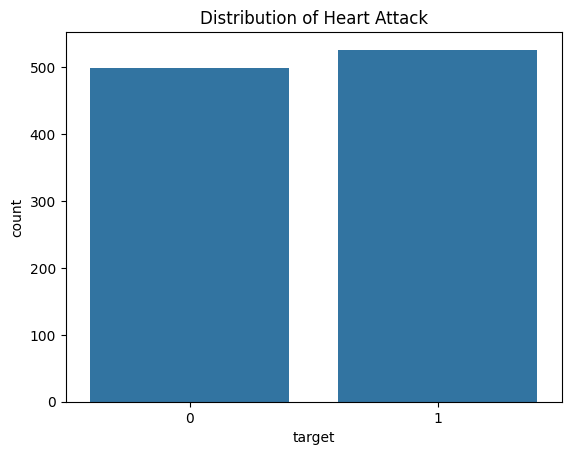

In [ ]:
# Explore the distribution of the target variable
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Attack')
plt.show()

Binary variable (0 for no, 1 for yes). The dataset is balanced with majority of patients having heart disease.

In [ ]:
df.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

1. Age: Ranges from 29 to 77 years. The distribution is fairly normal as indicated by the mean (54.43) being close to the median (56).
2. The average age in the dataset is approximately 54 years.
3. Chest Pain (cp): Ranges from 0 to 3. The mean is closer to 1, suggesting that most patients have a low level of chest pain.
4. The majority of the patients are male (about 70%).
5. Resting Blood Pressure (trestbps): Ranges from 94 to 200 mm Hg. The standard deviation is relatively small (17.52), indicating that most values are close to the mean (131.61).
6. Cholesterol (chol): Ranges from 126 to 564 mg/dl. The maximum value (564 mg/dl) is quite high and could be considered an outlier or a potential error.
The average cholesterol level is 246 mg/dl.
The average maximum heart rate achieved is 149 bpm.
7. Fasting Blood Sugar (fbs): Binary variable (0 for < 120 mg/dl, 1 for > 120 mg/dl). Only about 15% of patients have a fasting blood sugar above 120 mg/dl.
8. Resting ECG (restecg): Ranges from 0 to 2. Most patients have a value of 0 or 1, indicating normal or having ST-T wave abnormality.
9. Maximum Heart Rate (thalach): Ranges from 71 to 202 bpm. The distribution is slightly left-skewed as the mean (149.11) is less than the median (152).
10. Exercise Induced Angina (exang): Binary variable (0 for no, 1 for yes). About 34% of patients experience angina due to exercise.
11. ST Depression (oldpeak): Ranges from 0 to 6.2. The maximum value (6.2) is significantly higher than the 75th percentile (1.8), suggesting potential outliers.The standard deviation for 'ST Depression (oldpeak)' is relatively high compared to its range (0 to 6.2), suggesting a wide variation in this measurement across patients.
12. Slope of the Peak Exercise ST Segment (slope): Ranges from 0 to 2. Most patients have a slope of 1 or 2.
13. Number of Major Vessels (ca): Ranges from 0 to 4. The mean (0.75) suggests that most patients have fewer than one visible vessel on fluoroscopy.
14. Thalassemia (thal): Ranges from 0 to 3. The distribution is skewed towards higher values, with most patients having a value of 2 or 3.

In [ ]:
df.skew()

age        -0.248866
sex        -0.851449
cp          0.529455
trestbps    0.739768
chol        1.074073
fbs         1.971339
restecg     0.180440
thalach    -0.513777
exang       0.692655
oldpeak     1.210899
slope      -0.479134
ca          1.261189
thal       -0.524390
target     -0.052778
dtype: float64

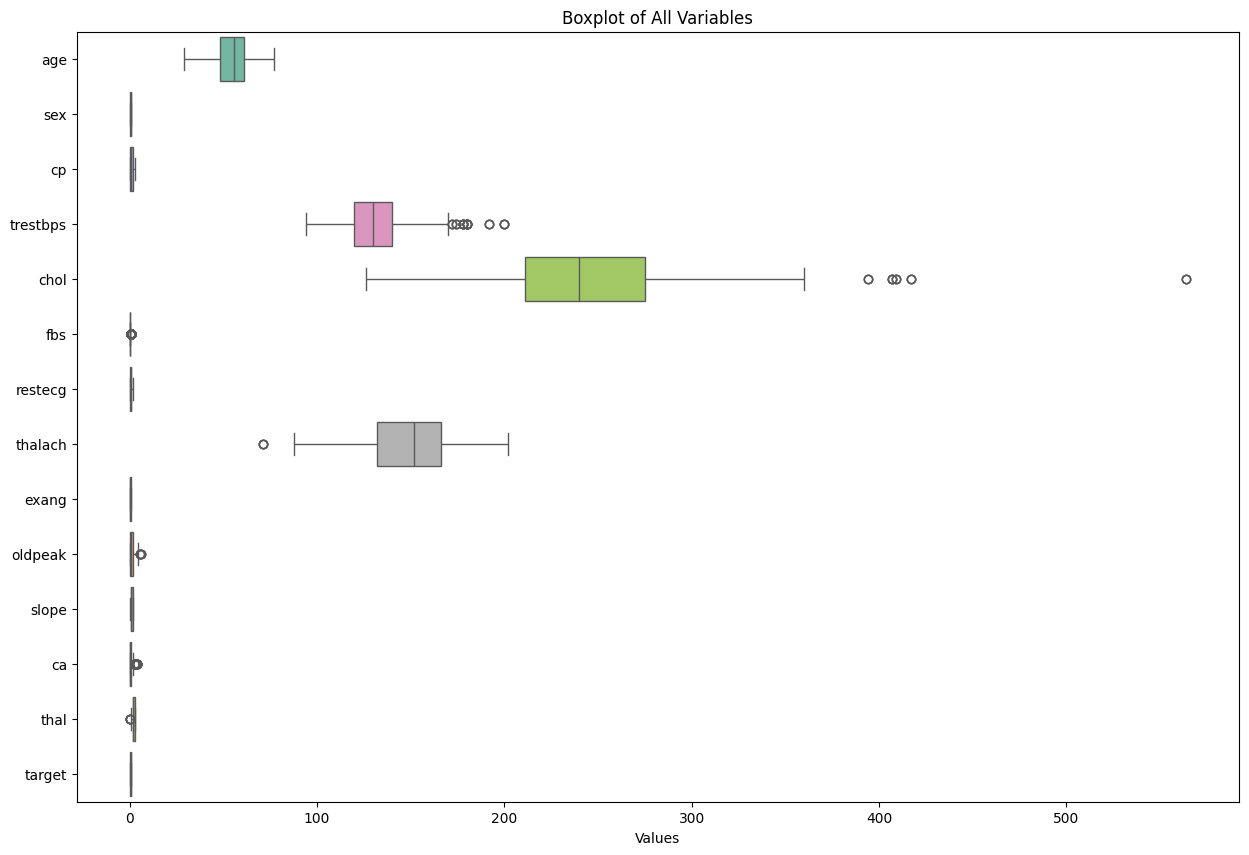

In [ ]:
#checking outliers for ST depression, Maximum Heart Rate (thalach), Cholesterol (chol), ca, fbs, trestbps
import matplotlib.pyplot as plt
import seaborn as sns

# Set the background color to white for visibility
plt.figure(figsize=(15, 10), facecolor='white')

# Create a boxplot for each column to visualize outliers
sns.boxplot(data=df, orient='h', palette='Set2')
plt.title('Boxplot of All Variables')
plt.xlabel('Values')
plt.show()

Cholesterol (chol) and ST Depression (oldpeak) show notable outliers, as indicated by points that lie far outside the upper whiskers.
Other variables like Resting Blood Pressure (trestbps) and Maximum Heart Rate (thalach) also display some outliers, but they are closer to the main distribution.

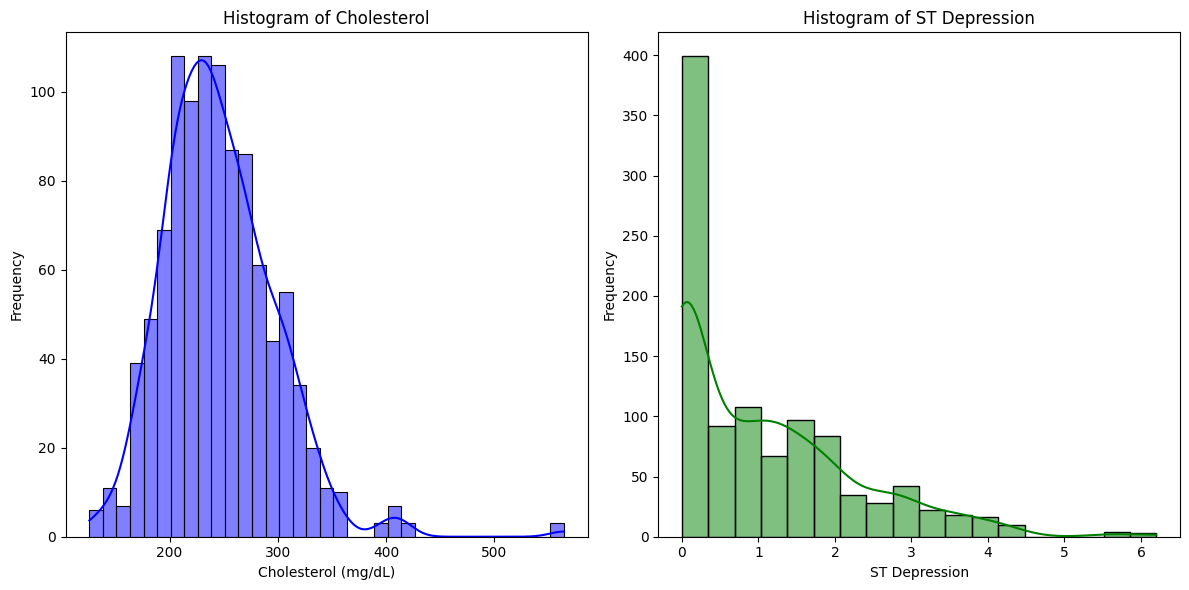

In [ ]:
# Set the background color to white for visibility
plt.figure(figsize=(12, 6), facecolor='white')

# Histogram for Cholesterol
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot
sns.histplot(df['chol'], kde=True, color='blue')
plt.title('Histogram of Cholesterol')
plt.xlabel('Cholesterol (mg/dL)')
plt.ylabel('Frequency')

# Histogram for ST Depression
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
sns.histplot(df['oldpeak'], kde=True, color='green')
plt.title('Histogram of ST Depression')
plt.xlabel('ST Depression')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

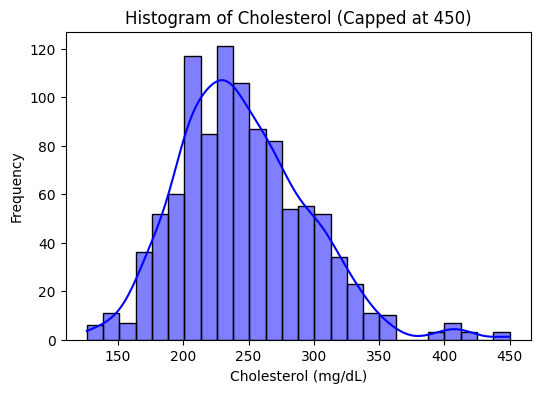

In [ ]:
#removing outliers from cholestrol by capping to 450
# Capping the 'chol' values at 450
df['chol'] = df['chol'].apply(lambda x: min(x, 450))

# Display the updated histogram for Cholesterol to see the effect of capping
plt.figure(figsize=(6, 4), facecolor='white')
sns.histplot(df['chol'], kde=True, color='blue')
plt.title('Histogram of Cholesterol (Capped at 450)')
plt.xlabel('Cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.show()

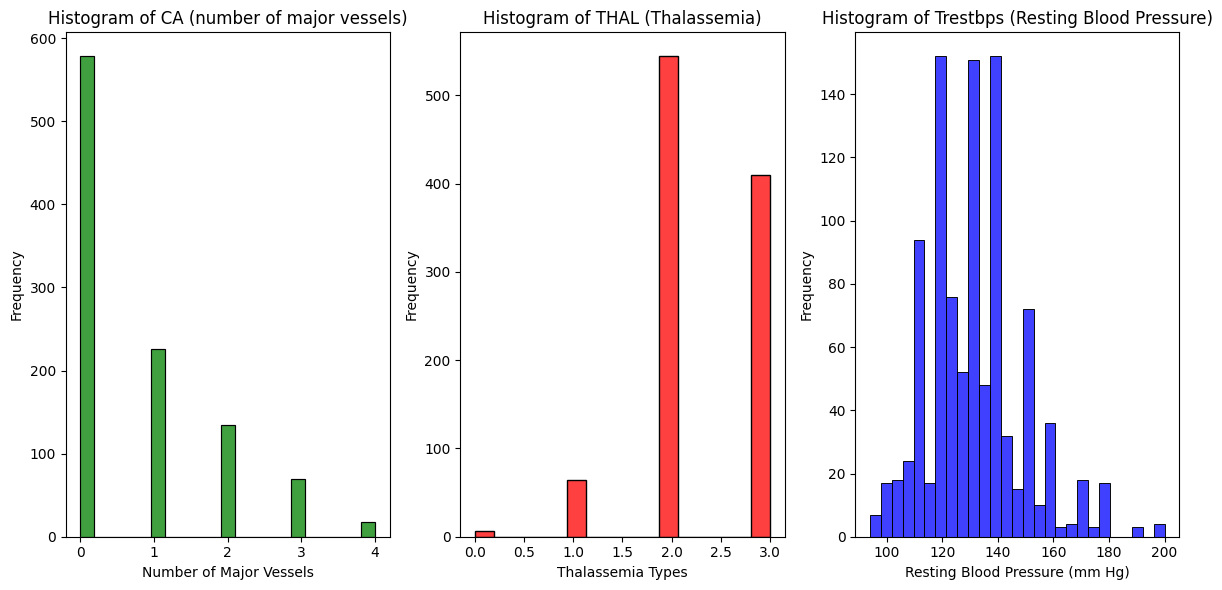

In [ ]:
# Visualize the distribution of 'ca', 'thal' & 'trestbps' columns to investigate potential outliers
plt.figure(figsize=(12, 6), facecolor='white')

# Histogram for 'ca'
plt.subplot(1, 3, 1)
sns.histplot(df['ca'], kde=False, color='green')
plt.title('Histogram of CA (number of major vessels)')
plt.xlabel('Number of Major Vessels')
plt.ylabel('Frequency')

# Histogram for 'thal'
plt.subplot(1, 3, 2)
sns.histplot(df['thal'], kde=False, color='red')
plt.title('Histogram of THAL (Thalassemia)')
plt.xlabel('Thalassemia Types')
plt.ylabel('Frequency')

# Histogram for 'trestbps'
plt.subplot(1, 3, 3)
sns.histplot(df['trestbps'], kde=False, color='blue')
plt.title('Histogram of Trestbps (Resting Blood Pressure)')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

1. We have capped the value number of major vessels (0-3) - 'ca'  colored by flourosopy - as mentioned in the data dictionary. there is no value as 4
2. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect - this is mentioned in the dictionary, hence the value is capped at 3 even though there was lot of outliers with the  value 4. this could be an error or a category not mentioned in the data dictionary

Lastly, the value above 180 mm can be an outlier as normla humans do not have naything above 180 mm. any value above 180 mm is a critical and emergency case. However, for the purpose pf examining the impact of heart attack on such emergency cases as well, I have not capped the value.

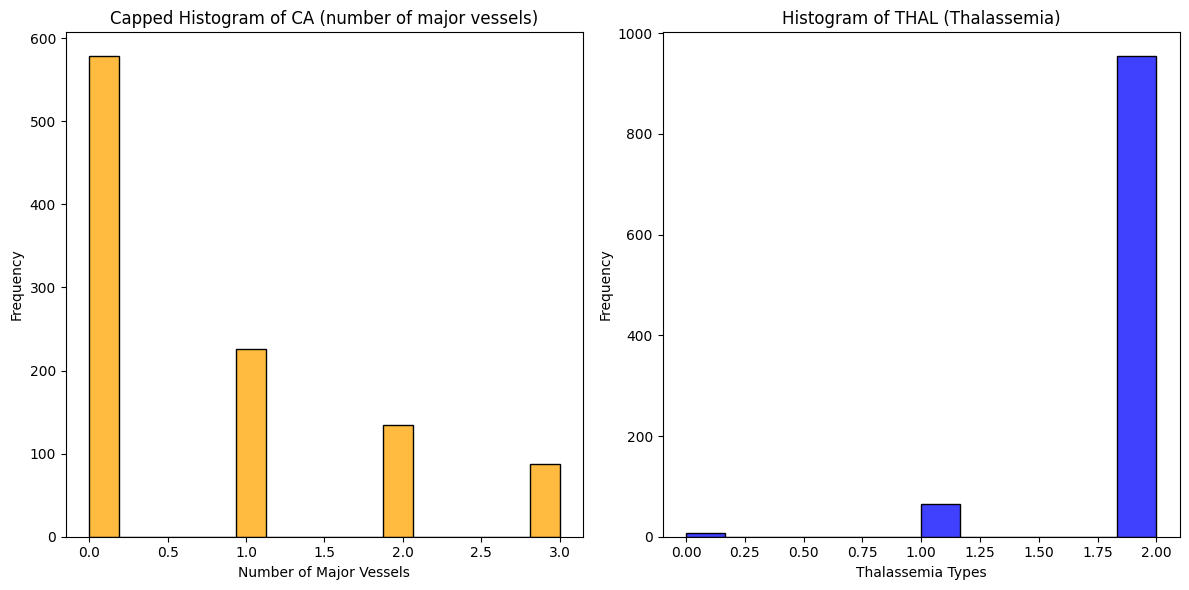

In [ ]:
# Cap the values of 'thal' at 2 and 'ca' at 3
df['thal'] = df['thal'].clip(upper=2)
df['ca'] = df['ca'].clip(upper=3)

# Generate histograms for the capped 'ca' and 'thal'
plt.figure(figsize=(12, 6), facecolor='white')

# Histogram for capped 'ca'
plt.subplot(1, 2, 1)
sns.histplot(df['ca'], kde=False, color='orange')
plt.title('Capped Histogram of CA (number of major vessels)')
plt.xlabel('Number of Major Vessels')
plt.ylabel('Frequency')

# Histogram for capped 'thal'
plt.subplot(1, 2, 2)
sns.histplot(df['thal'], kde=False, color='blue')
plt.title('Histogram of THAL (Thalassemia)')
plt.xlabel('Thalassemia Types')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


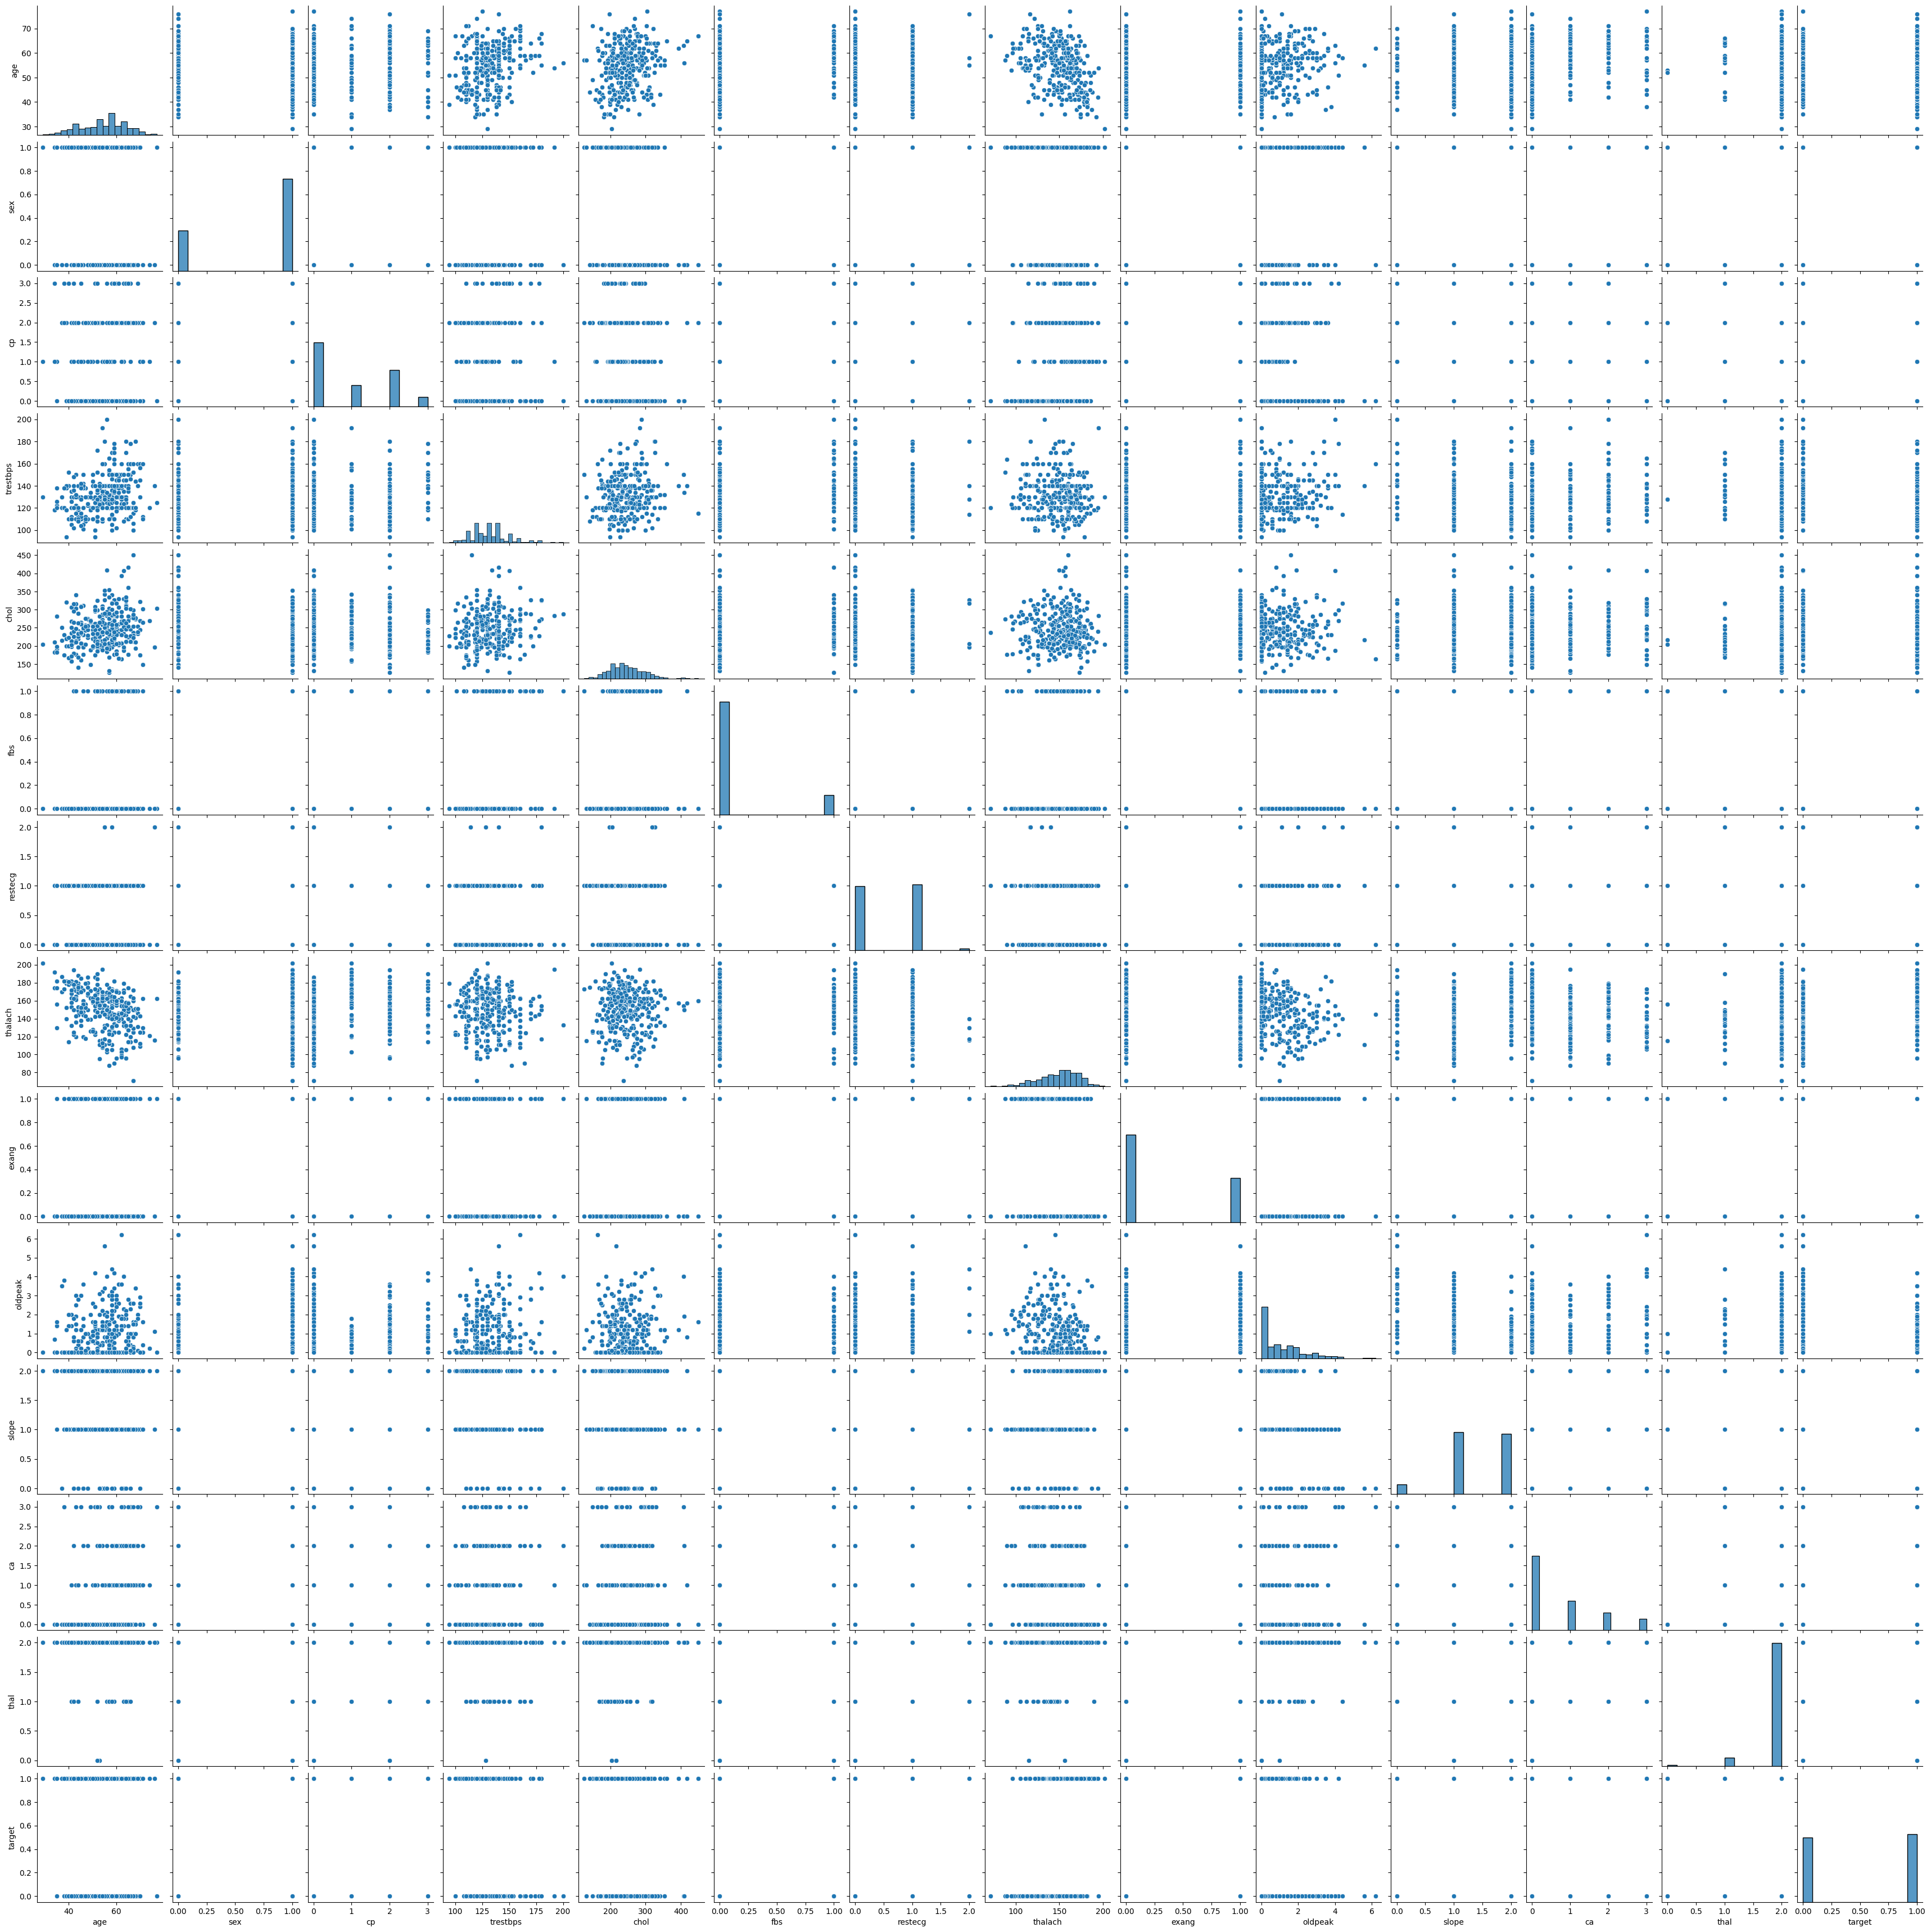

In [ ]:
# Explore the distribution of numerical features
sns.pairplot(df)
plt.show()

Age and thalach seem to have a inverse relation
old peak and thal have a positive relationahip. old peak seems to increase as thal increases

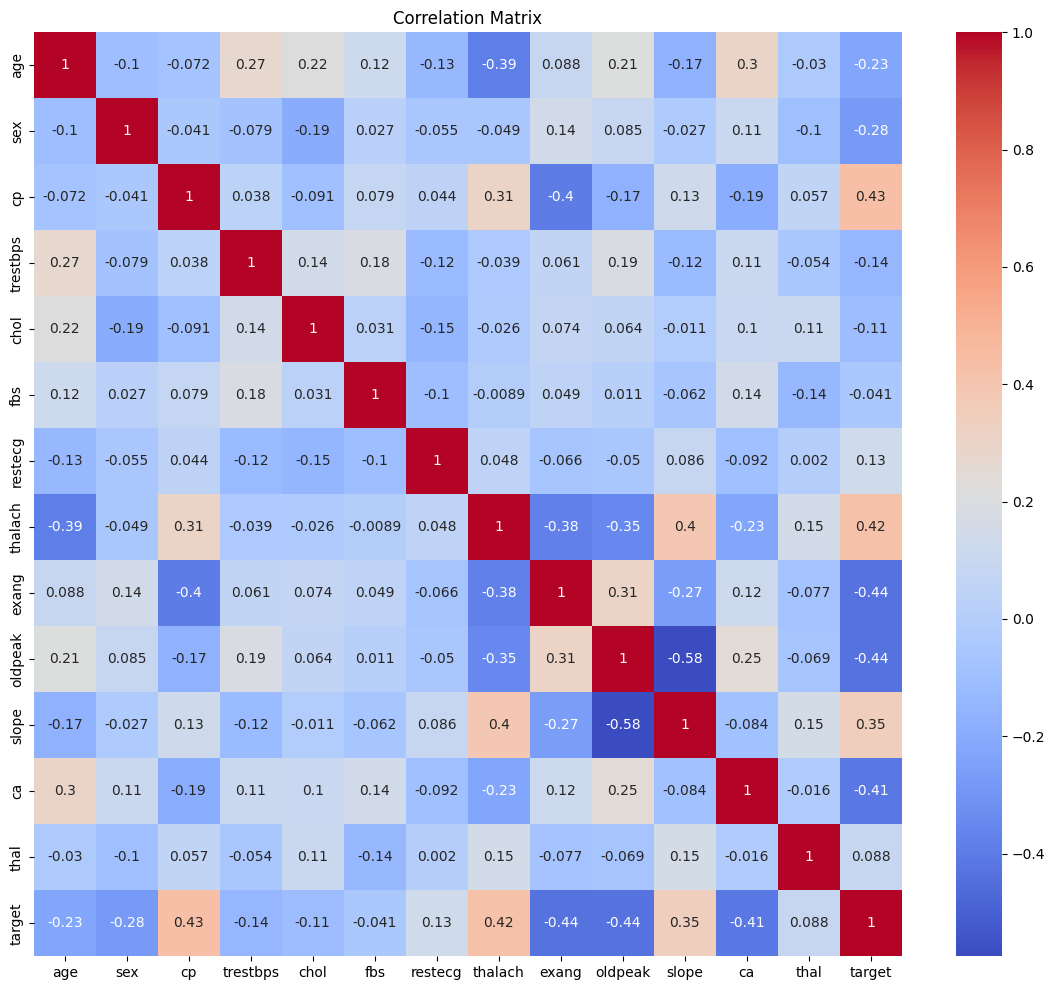

In [ ]:
# Explore correlations between features
plt.figure(figsize=(14,12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

There are no significant correlations between the features

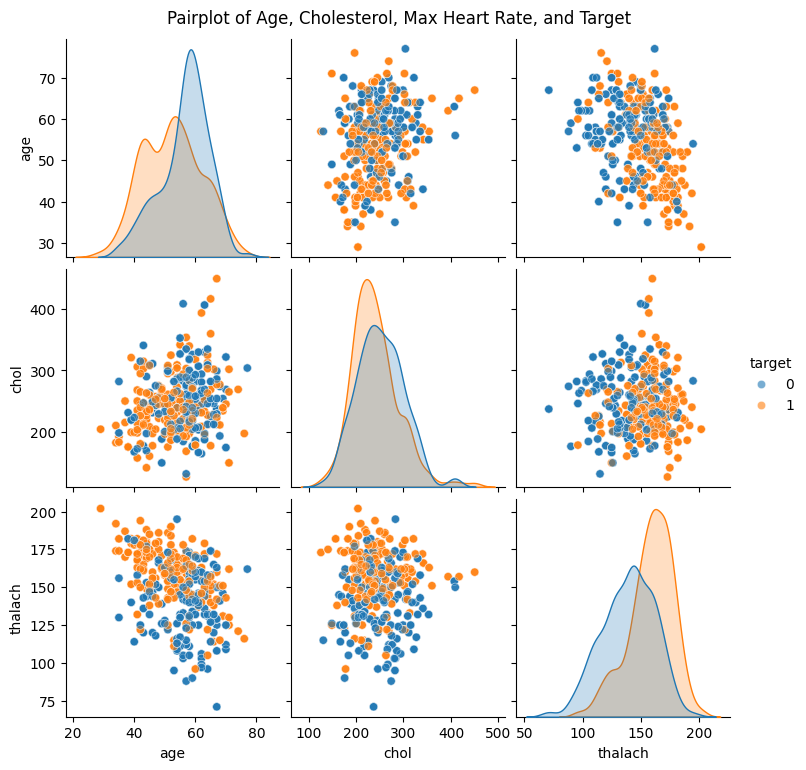

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot for the specified columns
sns.pairplot(df[['age', 'chol', 'thalach', 'target']], hue='target', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Age, Cholesterol, Max Heart Rate, and Target', y=1.02)
plt.show()

Observations from the Pairplot:
1. Age vs. Cholesterol:
There appears to be a slight positive trend, suggesting that cholesterol levels might increase with age.
2. Age vs. Maximum Heart Rate (thalach):
A negative trend is observed, indicating that maximum heart rate tends to decrease as age increases.
3. Cholesterol vs. Maximum Heart Rate (thalach):
No clear trend is visible, suggesting little to no direct relationship between cholesterol levels and maximum heart rate.
4. Target (Presence of Heart Disease):
The plots segmented by 'target' show different distributions for patients with and without heart disease, particularly noticeable in the scatter plots involving 'thalach', where individuals with heart disease tend to have lower maximum heart rates.

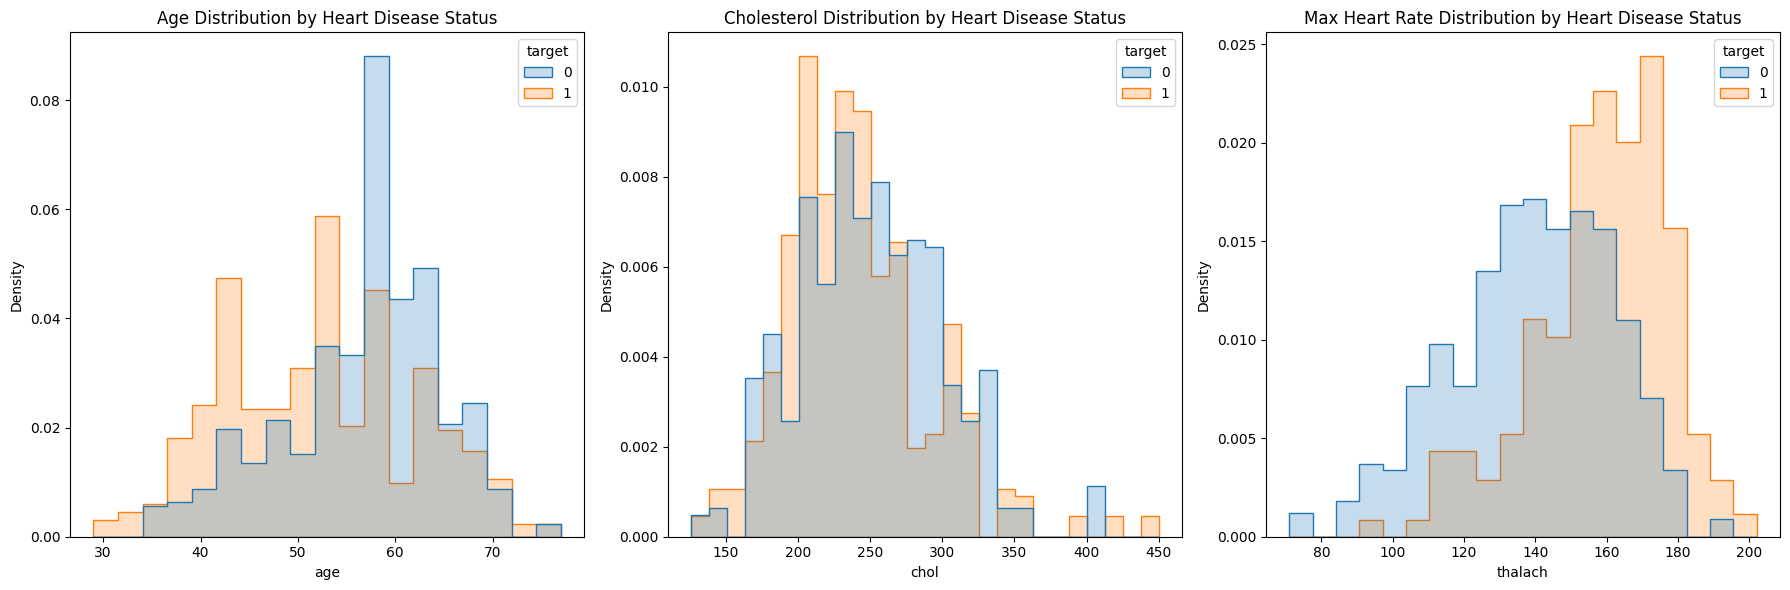

In [ ]:
# Generate distribution plots for 'age', 'chol', and 'thalach' based on the 'target' variable
plt.figure(figsize=(18, 6), facecolor='white')

# Distribution of 'age'
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='age', hue='target', element='step', stat='density', common_norm=False)
plt.title('Age Distribution by Heart Disease Status')

# Distribution of 'chol'
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='chol', hue='target', element='step', stat='density', common_norm=False)
plt.title('Cholesterol Distribution by Heart Disease Status')

# Distribution of 'thalach'
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='thalach', hue='target', element='step', stat='density', common_norm=False)
plt.title('Max Heart Rate Distribution by Heart Disease Status')

plt.tight_layout()
plt.show()

Analysis of Distribution Characteristics:
Age:

•	Generate distribution plots for 'age', 'chol', and 'thalach' based on the 'target' variable. The plots show that :
•	Individuals with heart disease (target = 1) tend to be peak around 52-55 age group. Those without heart disease (target = 0) tend to peak at 57-59 age group

•	Cholesterol (Chol): The distribution of cholesterol levels for individuals with heart disease appears slightly higher on average compared to those without heart disease. The peak for target=1, being 200-210 and peal for target =0 being 230-240

•	Maximum Heart Rate (Thalach):Individuals with heart disease tend to have a higher maximum heart rate, with a peak around 170-180 beats per minute. The individuals with target = 0, show a blunt peak between 140-150, although those without heart disease generally exhibit lower maximum heart rates, with a more spread out distribution


In [ ]:
# Analyzing Age and Heart Disease
age_hd = df.groupby('target')['age'].mean()

# Analyzing Sex and Heart Disease
sex_hd = df.groupby('sex')['target'].value_counts()

# Analyzing Chest Pain Type and Heart Disease
cp_hd = df.groupby('cp')['target'].value_counts()

# Analyzing Resting Blood Pressure and Heart Disease
trestbps_hd = df.groupby('target')['trestbps'].mean()

# Analyzing Cholesterol Levels and Heart Disease
chol_hd = df.groupby('target')['chol'].mean()


# Grouping by exercise-induced angina and calculating the mean of heart disease occurrence
df_exang_hd = df.groupby('exang')['target'].value_counts()

# Print the results
print('Average Age by Heart Disease Status:\n', age_hd)
print('\nSex Distribution:\n', sex_hd)
print('\nChest Pain Type and Heart Disease Risk:\n', cp_hd)
print('\nAverage Resting Blood Pressure by Heart Disease Status:\n', trestbps_hd)
print('\nAverage Cholesterol Levels by Heart Disease Status:\n', chol_hd)
print('Exercise-Induced Angina and Heart Disease Risk:\
', df_exang_hd)

Average Age by Heart Disease Status:
 target
0    56.569138
1    52.408745
Name: age, dtype: float64

Sex Distribution:
 sex  target
0    1         226
     0          86
1    0         413
     1         300
Name: count, dtype: int64

Chest Pain Type and Heart Disease Risk:
 cp  target
0   0         375
    1         122
1   1         134
    0          33
2   1         219
    0          65
3   1          51
    0          26
Name: count, dtype: int64

Average Resting Blood Pressure by Heart Disease Status:
 target
0    134.106212
1    129.245247
Name: trestbps, dtype: float64

Average Cholesterol Levels by Heart Disease Status:
 target
0    251.292585
1    240.328897
Name: chol, dtype: float64
Exercise-Induced Angina and Heart Disease Risk: exang  target
0      1         455
       0         225
1      0         274
       1          71
Name: count, dtype: int64


In [ ]:
# make a plot of age column using plotly and coloring by dataset
import plotly.express as px

fig = px.histogram(data_frame=df, x='age', color= 'sex')
fig.show()

# print the mean median and mode of age column grouped by dataset column
print("___________________________________________________________")
print ("Mean of the dataset: ",df.groupby('sex')['age'].mean())
print("___________________________________________________________")
print ("Median of the dataset: ",df.groupby('sex')['age'].median())
print("___________________________________________________________")
print ("Mode of the dataset: ",df.groupby('sex')['age'].agg(pd.Series.mode))
print("___________________________________________________________")

___________________________________________________________
Mean of the dataset:  sex
0    55.849359
1    53.814867
Name: age, dtype: float64
___________________________________________________________
Median of the dataset:  sex
0    57.0
1    55.0
Name: age, dtype: float64
___________________________________________________________
Mode of the dataset:  sex
0    62
1    58
Name: age, dtype: int64
___________________________________________________________


Note: It was also found that the distribution peak was same for both the sexes, which was at 58-59 years age group. The lowest peak for sex=0, was 74-77 years while sex=1 was for 28-29 age group.

<Axes: xlabel='cp', ylabel='count'>

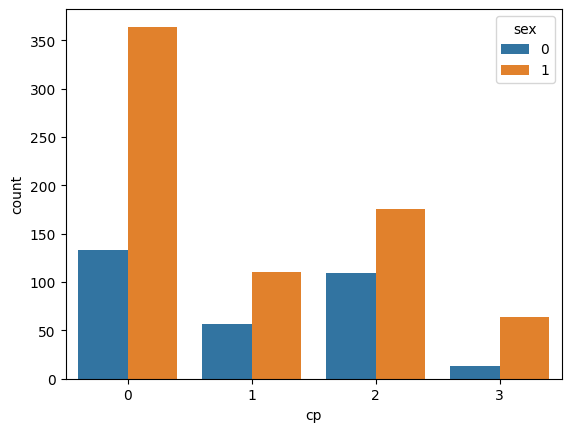

In [ ]:
# count plot of cp column by sex column
sns.countplot(df, x='cp', hue= 'sex')

•	count plot of cp column by sex column: cp is highest for category 0 for both the sexes and lowest for category 3 for both the sexes.

<Axes: xlabel='thal', ylabel='count'>

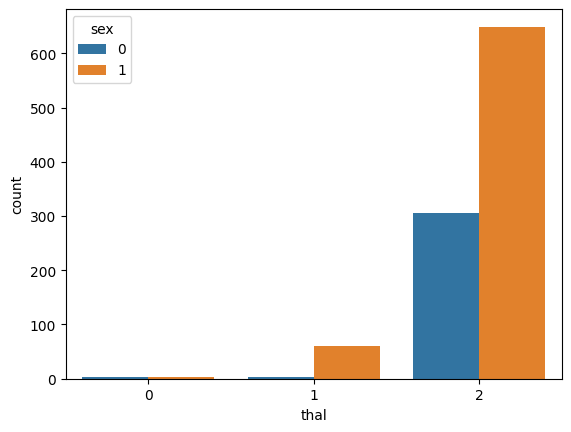

In [ ]:
# count plot of thal column by sex column
sns.countplot(df, x='thal', hue= 'sex')

count plot of thal column by sex column: thal is highest for category 2 for both the sexes and lowest for category 0 for both the sexes.

<Axes: xlabel='thal', ylabel='count'>

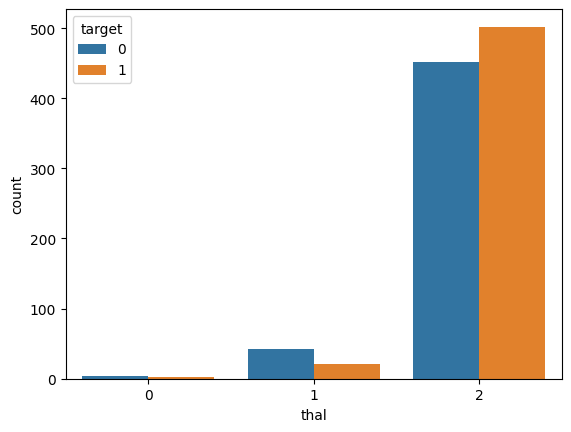

In [ ]:
# count plot of thal column by sex column
sns.countplot(df, x='thal', hue= 'target')

•	count plot of thal column by target column: thal is highest for category 2 for both the target values and lowest for category 0 for both the target values.

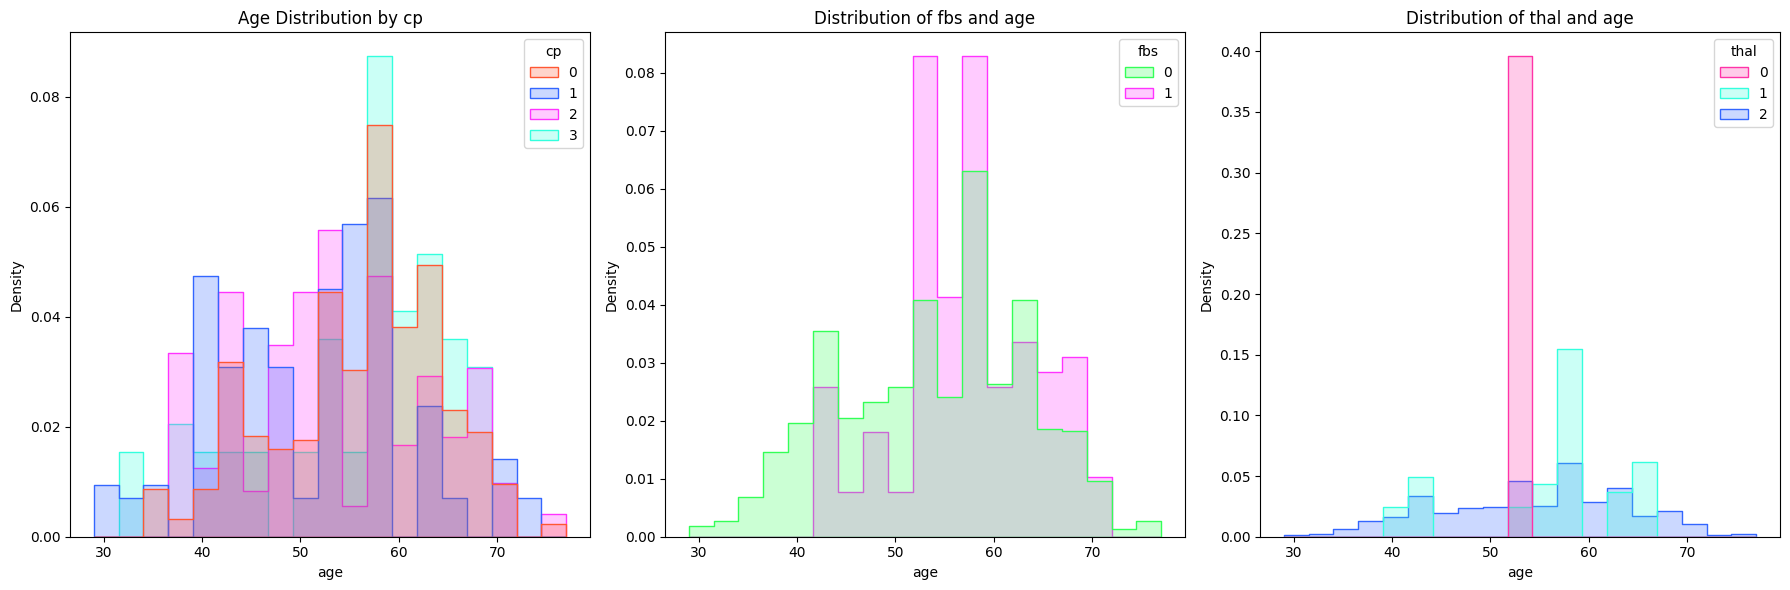

In [ ]:
plt.figure(figsize=(18, 6), facecolor='white')

# Define custom color palettes
custom_palette1 = ['#FF5733', '#3366FF', '#FF33FF', '#33FFDE']  # Custom colors for the first subplot
custom_palette2 = ['#33FF57', '#FF33FF', '#3366FF']  # Custom colors for the second subplot
custom_palette3 = ['#FF33A8', '#33FFDE', '#3366FF']  # Custom colors for the third subplot


# Distribution of age and cp
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='age', hue='cp', element='step', stat='density', common_norm=False, palette=custom_palette1)
plt.title('Age Distribution by cp')

# Distribution of 'fbs and age'
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='age', hue='fbs', element='step', stat='density', common_norm=False, palette=custom_palette2)
plt.title('Distribution of fbs and age')

# Distribution of 'thal and age'
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='age', hue='thal', element='step', stat='density', common_norm=False, palette=custom_palette3)
plt.title('Distribution of thal and age')

plt.tight_layout()
plt.show()

•	The first plot for cp shows the highest frequency around ages 58-60 for all categories. Category 3 is the highest category

•	The second plot for fbs has a bimodal distribution for category 1of fbs across ages.  The highest frequency can be seen with age 57-60 for both categories. Category 1 has higher frequency than category 0

•	The third plot for thal has peaks around ages 52-55 for category 0 and 58-60 for category 1 and 2. Category 0 has higher frequency than category as compared to category 1 and 2


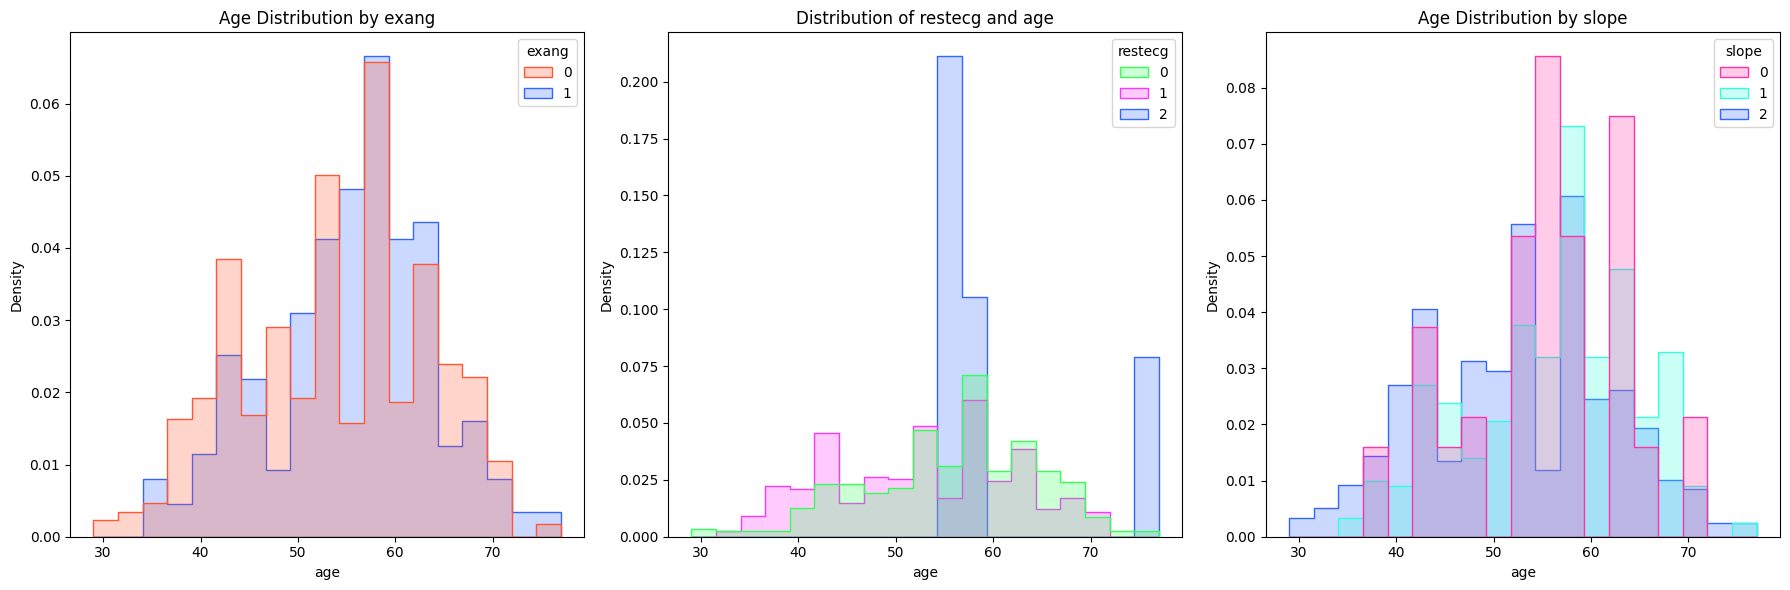

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom color palettes
custom_palette1 = ['#FF5733', '#3366FF']  # Custom colors for the first subplot
custom_palette2 = ['#33FF57', '#FF33FF', '#3366FF']  # Custom colors for the second subplot
custom_palette3 = ['#FF33A8', '#33FFDE', '#3366FF']  # Custom colors for the third subplot

plt.figure(figsize=(18, 6), facecolor='white')

# Distribution of age and exang
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='age', hue='exang', element='step', stat='density', common_norm=False, palette=custom_palette1)
plt.title('Age Distribution by exang')

# Distribution of 'restecg and age'
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='age', hue='restecg', element='step', stat='density', common_norm=False, palette=custom_palette2)
plt.title('Distribution of restecg and age')

# Distribution of 'slope and age'
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='age', hue='slope', element='step', stat='density', common_norm=False, palette=custom_palette3)
plt.title('Age Distribution by slope')

plt.tight_layout()
plt.show()


•	The first plot for exang shows the highest frequency around ages 58-60 for all categories. Category 1 has higher frequency as compared to category 0

•	The second plot for restecg shows highest frequency for restecg for category
2, the peak being between 55-60.  The highest frequency can be seen with age 58-60 for the other categories.

•	The third plot shows slope that peaks around ages 53-56 for category 0 and 58-60  for category 1 and 2. Category 0 has higher frequency as compared to category 1 and 2


In [ ]:
# make a plot of age column using plotly and coloring by ca

fig = px.histogram(data_frame=df, x='age', color= 'ca')
fig.show()

# print the mean median and mode of age column grouped by dataset column
print("___________________________________________________________")
print ("Mean of the dataset: ",df.groupby('ca')['age'].mean())
print("___________________________________________________________")
print ("Median of the dataset: ",df.groupby('ca')['age'].median())
print("___________________________________________________________")


___________________________________________________________
Mean of the dataset:  ca
0    51.605536
1    57.668142
2    59.537313
3    56.965517
Name: age, dtype: float64
___________________________________________________________
Median of the dataset:  ca
0    52.0
1    57.0
2    60.0
3    58.0
Name: age, dtype: float64
___________________________________________________________



Note: It was also found that the distribution peak was same for both the sexes, which was at 58-59 years age group. The lowest peak for sex=0, was 74-77 years while sex=1 was for 28-29 age group.

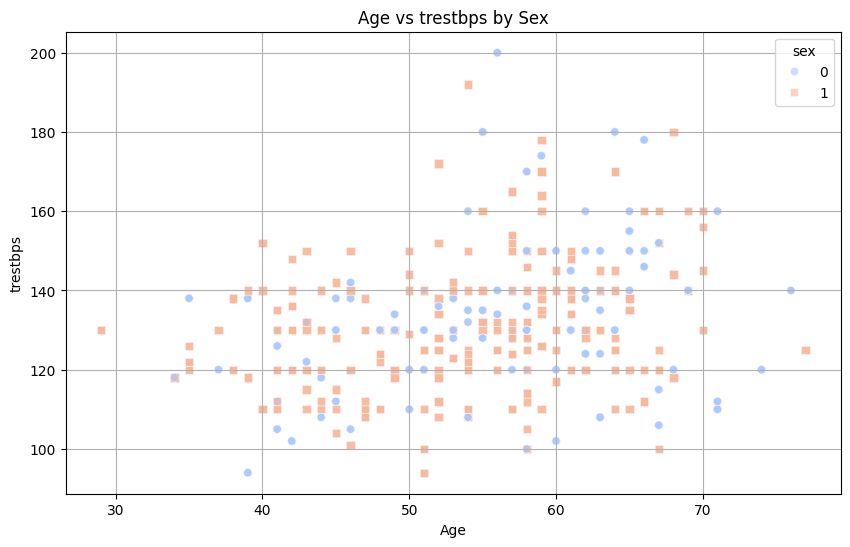

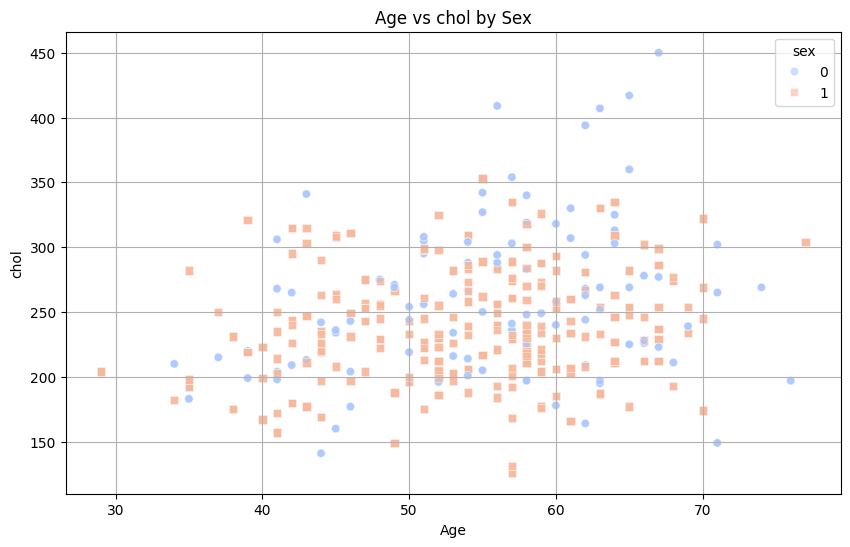

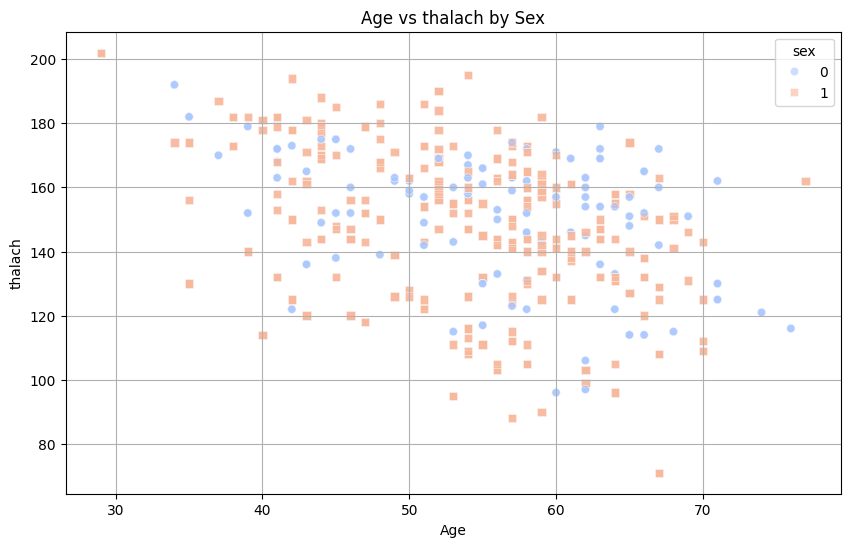

In [ ]:
# Define the risk factors to explore
risk_factors = ['trestbps', 'chol', 'thalach']

# Create visualizations for each risk factor by sex
for factor in risk_factors:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='age', y=factor, hue='sex', style='sex', palette='coolwarm', markers=['o', 's'], alpha=0.6)
    plt.title('Age vs ' + factor + ' by Sex')
    plt.xlabel('Age')
    plt.ylabel(factor)
    plt.grid(True)
    plt.show()

•	Age vs trestbps by Sex: A slightly positive or upward trend is observed with her relationship between Age and trestbps, the majority of sex being sex=1. It is most dense in 50-60 age group

•	Age vs thalach by sex: A slightly negative or downward trend is observed with her relationship between Age and thalach, the majority of sex being sex=1. It is most dense in 50-60 age group



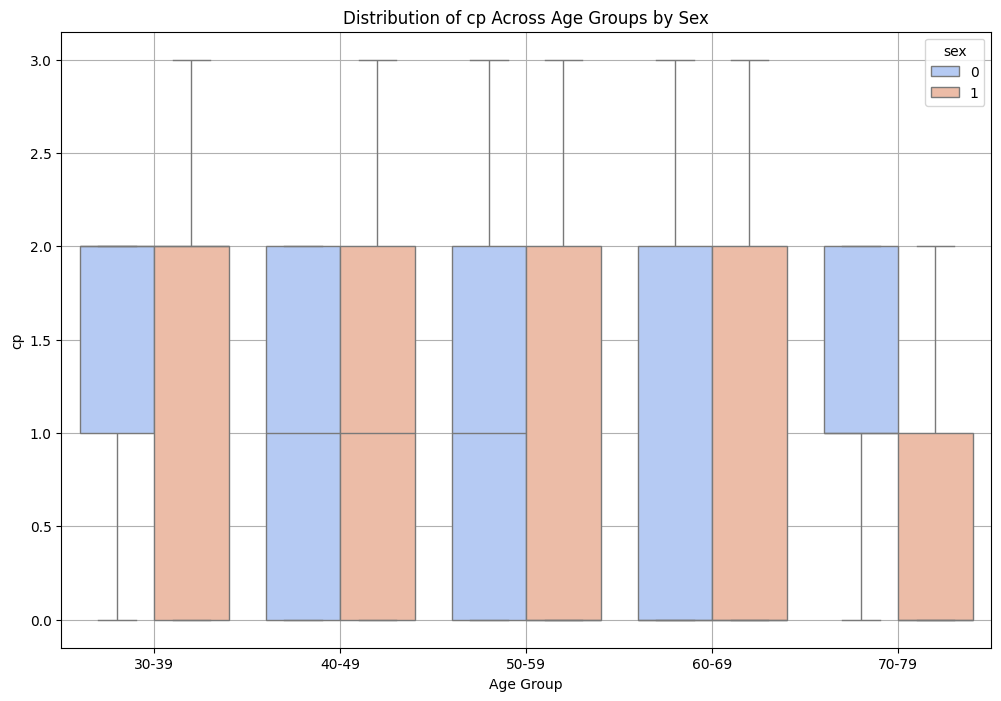

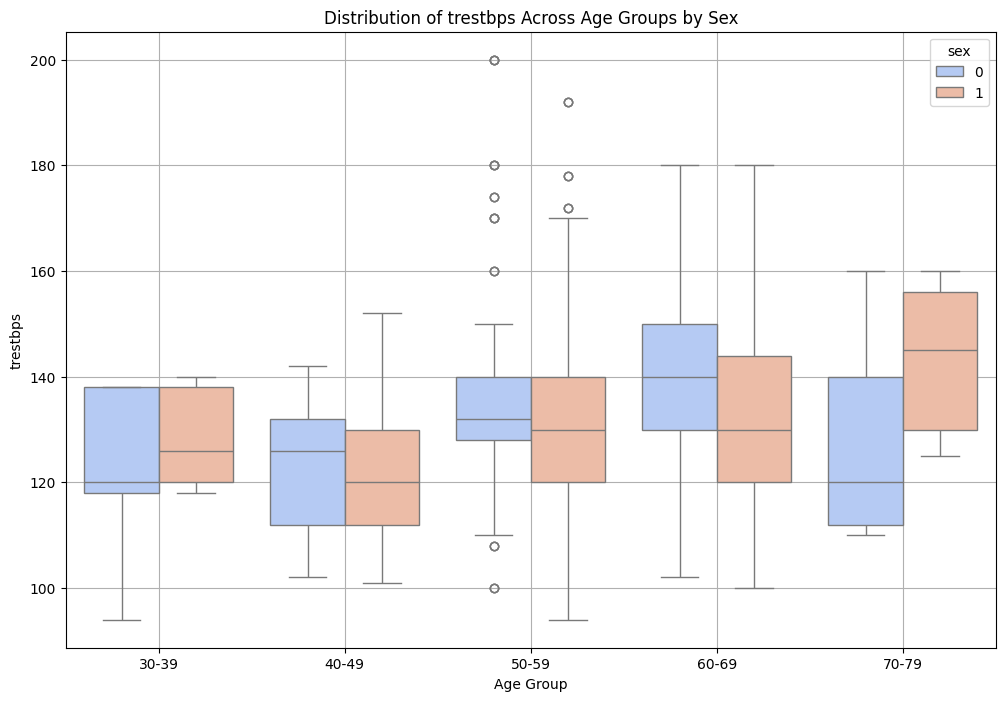

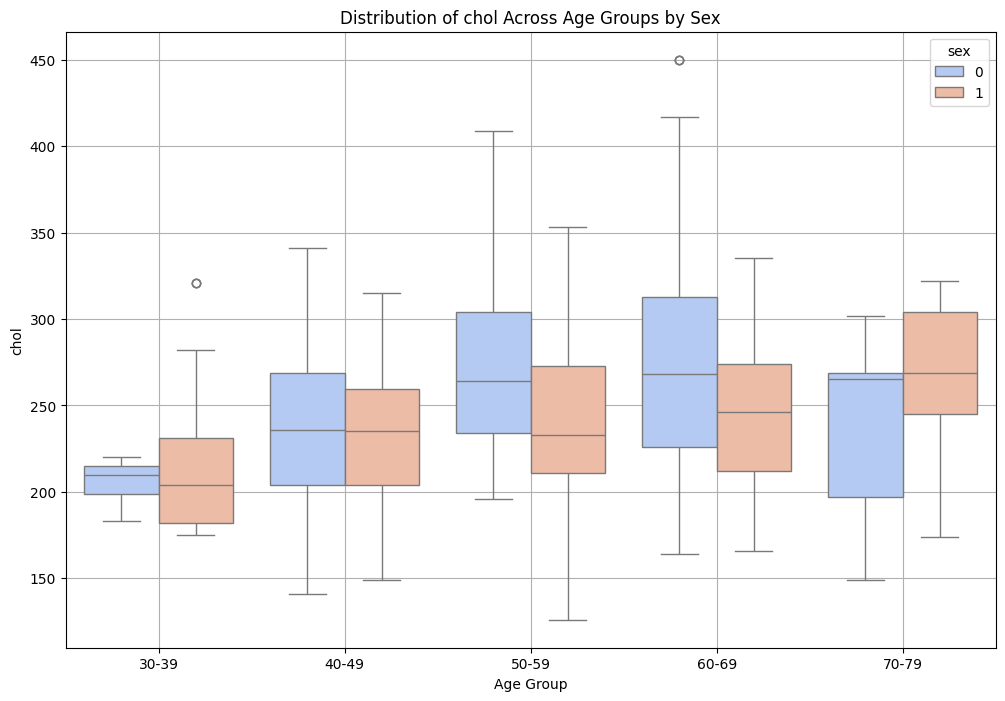

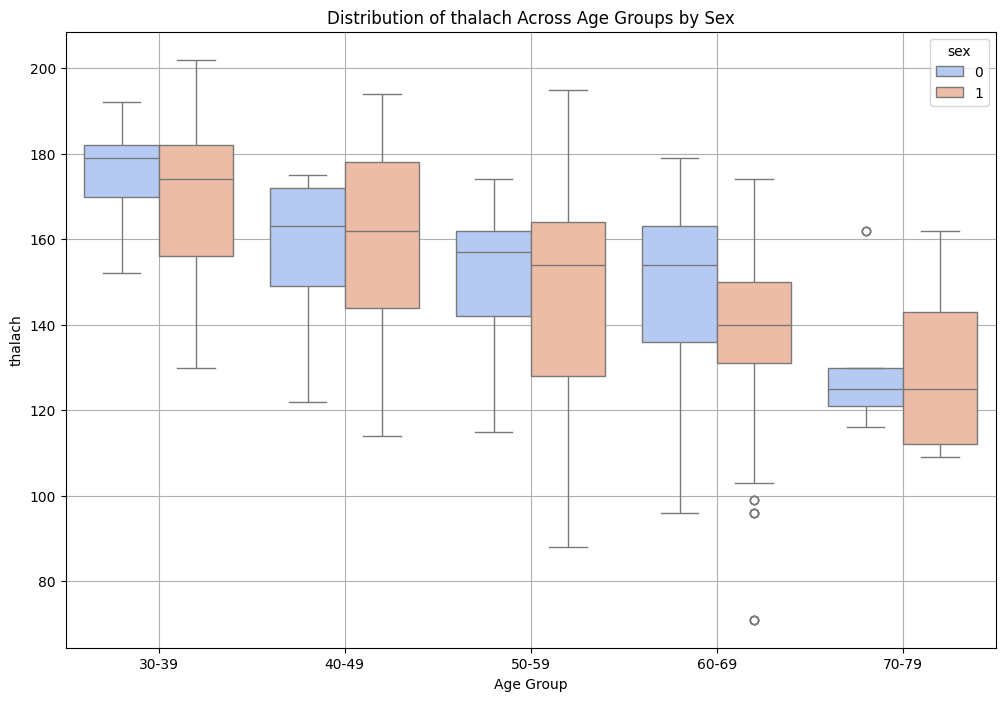

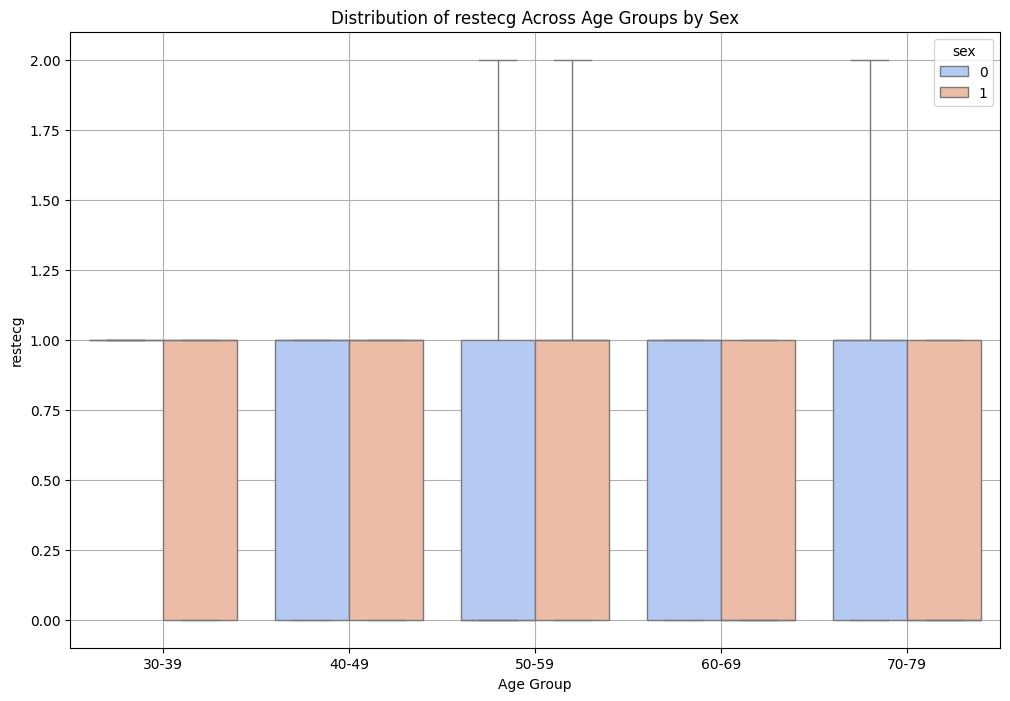

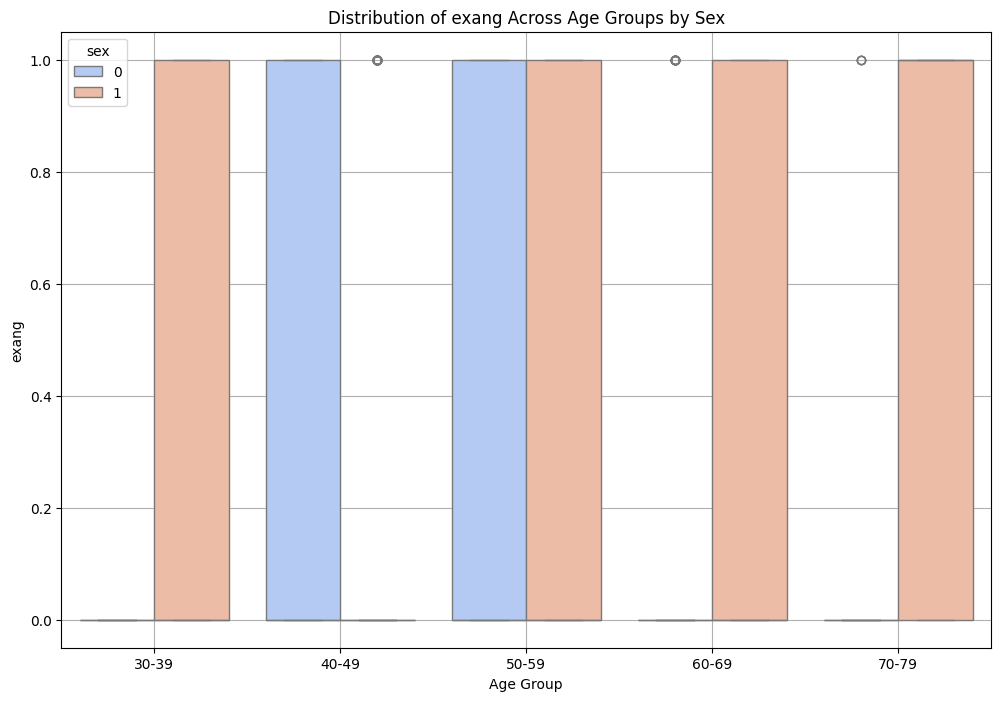

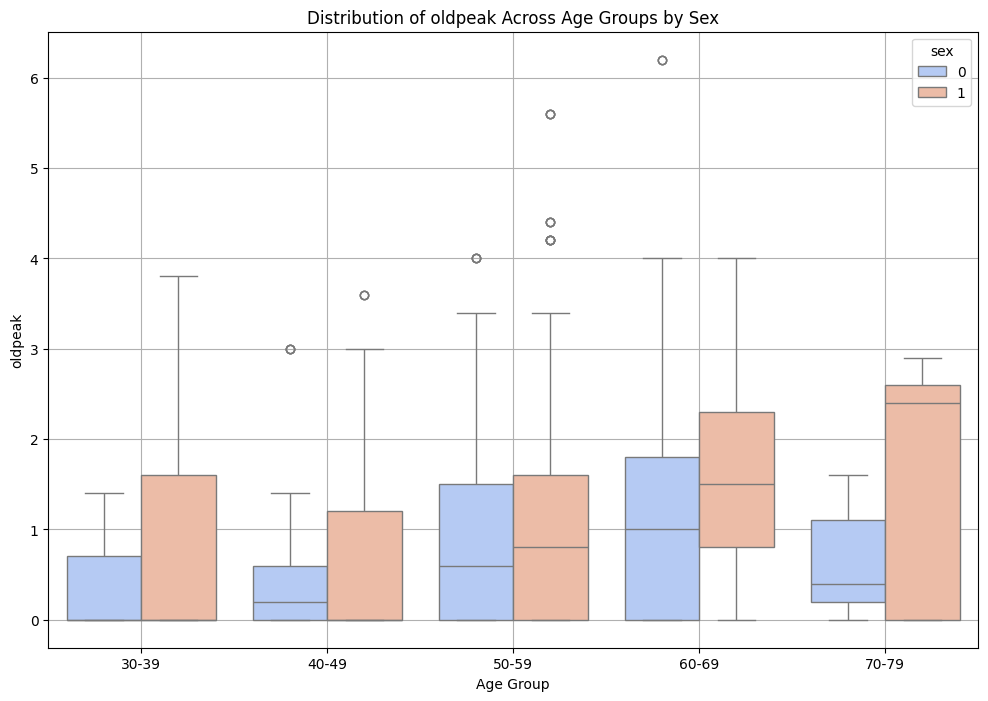

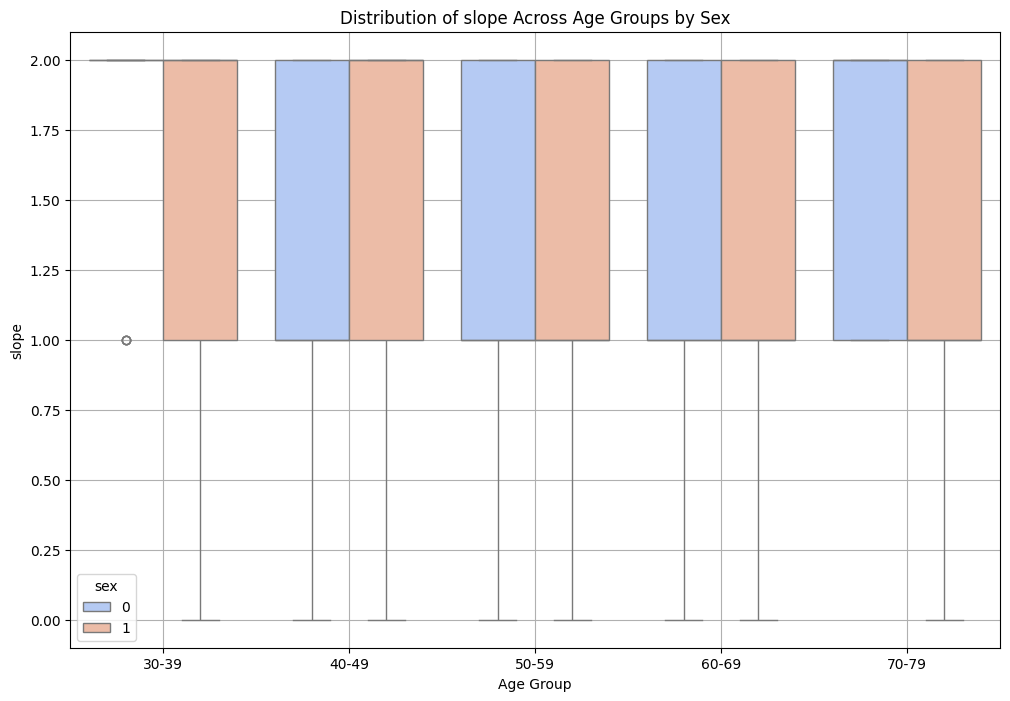

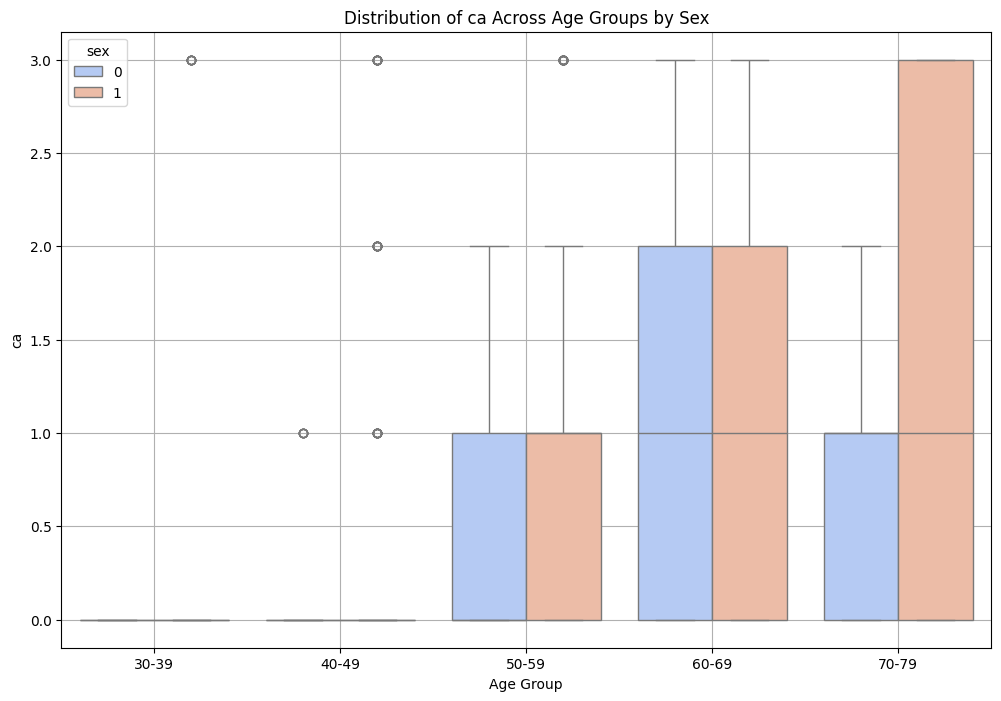

In [ ]:
# Define age groups
bins = [29, 40, 50, 60, 70, 80]
labels = ['30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Define the risk factors to explore
risk_factors = ['cp', 'trestbps', 'chol', 'thalach', 'restecg', 'exang', 'oldpeak', 'slope', 'ca']

# Create visualizations for each risk factor by age group and sex
for factor in risk_factors:
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df, x='age_group', y=factor, hue='sex', palette='coolwarm')
    plt.title('Distribution of ' + factor + ' Across Age Groups by Sex')
    plt.xlabel('Age Group')
    plt.ylabel(factor)
    plt.grid(True)
    plt.show()

•	cp, age and sex: The values are generally uniform for the younger age groups (40-69) for both sexes and lower for the older age groups (70-79) for both males and females. The consistent gap between males (blue) and females (orange), with sex=0 having higher values across all age groups, suggests that men tend to experience more chest pain or have a higher severity of chest pain compared to women of the same age group

•	Resting Blood Pressure (trestbps), age and sex: Blood pressure tends to increase with age for sex=1, with the highest levels observed in the 70-79 age group. The spread of values (represented by the box heights) appears to be quite wide, indicating substantial variability in resting blood pressure within each age and sex group.

•	Cholesterol (chol): Blood pressure tends to increase with age for sex=1, with the highest levels observed in the 70-79 age group. Sex=0 is at its peak in the 60-69 age group. The spread of values is generally wider in the older age groups, indicating greater variability in cholesterol levels among older individuals.

•	(Thalach - Maximum Heart Rate Achieved, age, sex):For both sexes, the maximum heart rate achieved tends to decrease with age, which is expected as cardiovascular fitness and maximum heart rate typically decline with aging.
Across most age groups, males (blue boxes) tend to have higher maximum heart rate values compared to females (orange boxes), potentially reflecting sex differences in cardiovascular fitness or physiology. There are several outliers, particularly in the older age groups, indicating individuals who achieved exceptionally high or low maximum heart rates for their age and sex.

•	restecg, age, sex: Overall, sex=1 generally exhibit slightly restecg across all age groups compared to sex=0.

•	Distribution of ca across age groups by sex: For the 30-39 and 40-49 age groups, both males and females have extremely low ca values, suggesting a lower prevalence of major vessels coloured by fluoroscopy (an indicator of heart disease) in these younger age groups.The highest ca values are observed in males aged 70-79, indicating a higher risk of heart disease in this age group for sex=1

•	Distribution of slope across age groups by sex: For all age groups, sex=1 tend to have a higher slope value compared to sex=0, indicating a steeper slope of the peak exercise ST segment in sex=1

•	Distribution of oldpeak across age groups by sex: For both sex=1, the oldpeak value tends to increase with age, indicating a higher ST depression during exercise as people get older.

•	For the age groups 30-39, 40-49, and 50-59, sex=0 generally have a upward trend. The highest oldpeak values are observed in the 70-79 age group for sex=1 and for sex=0, the highest peak is in the age group of 60-69.


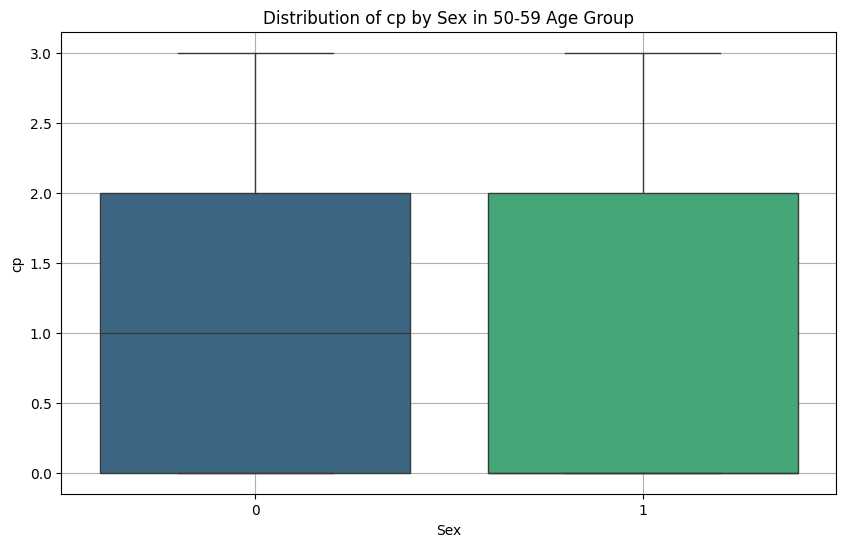

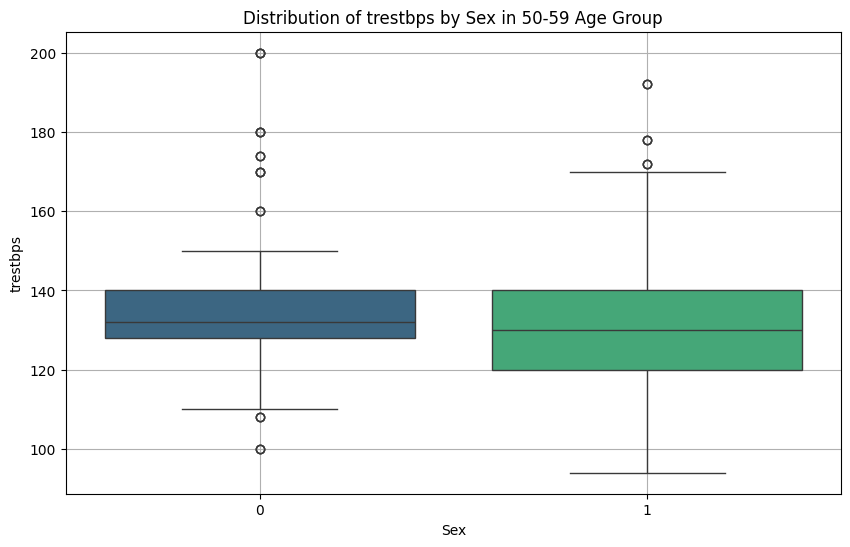

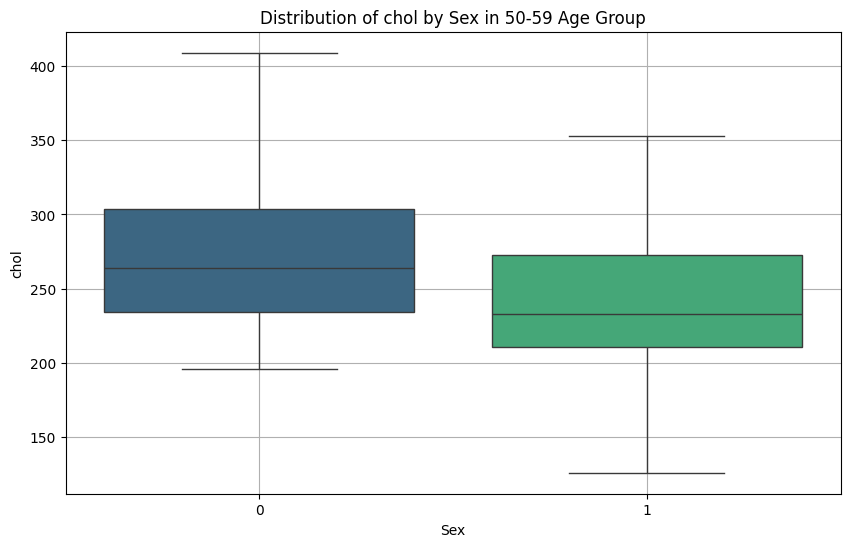

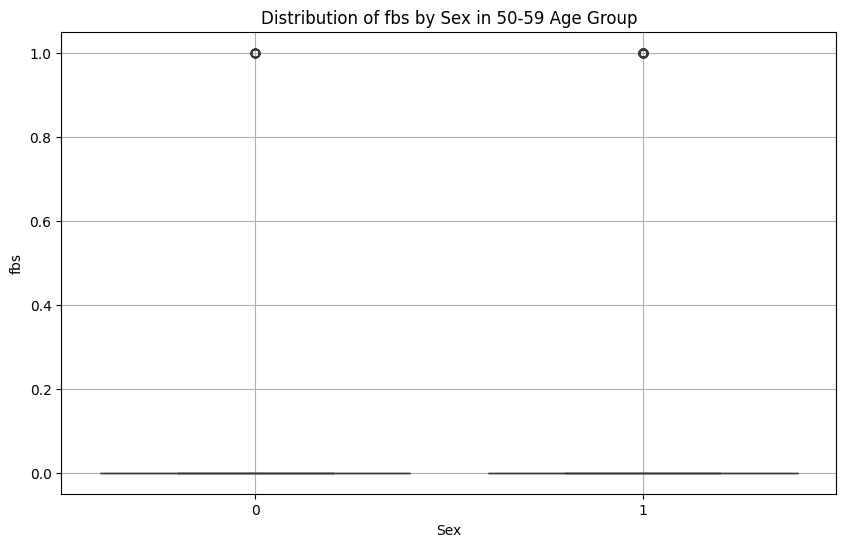

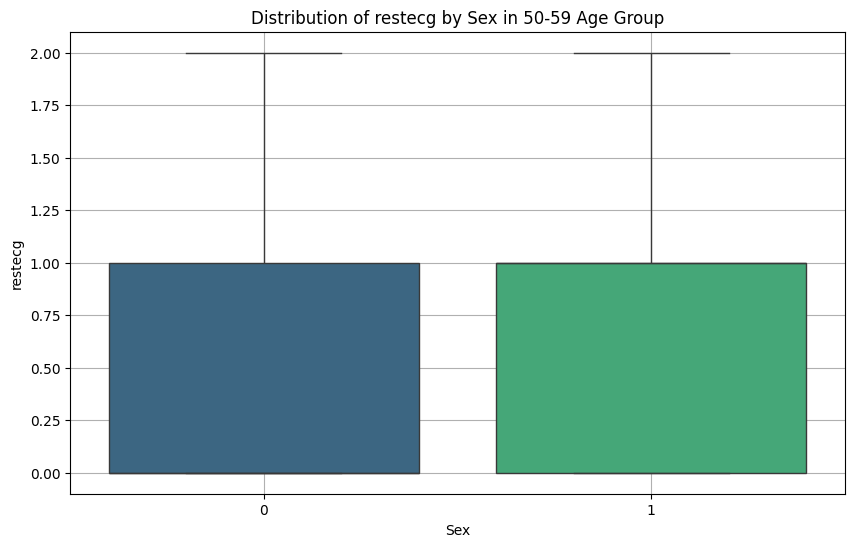

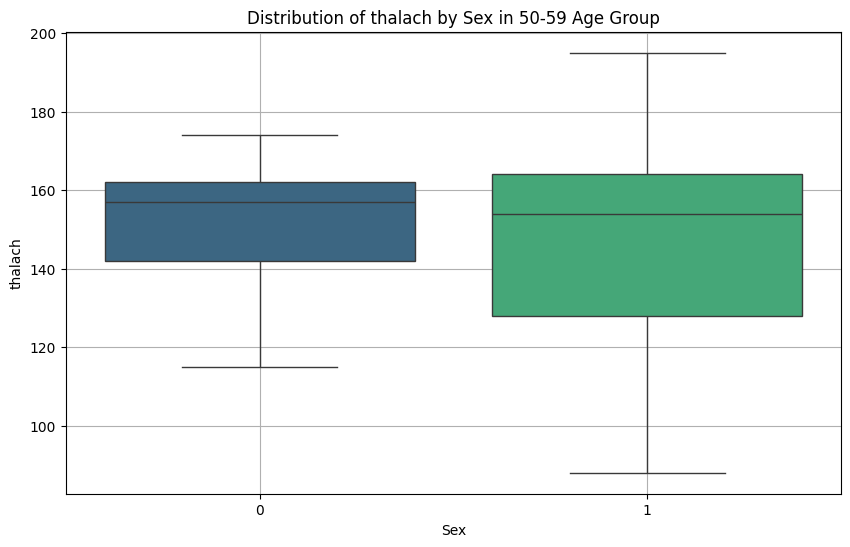

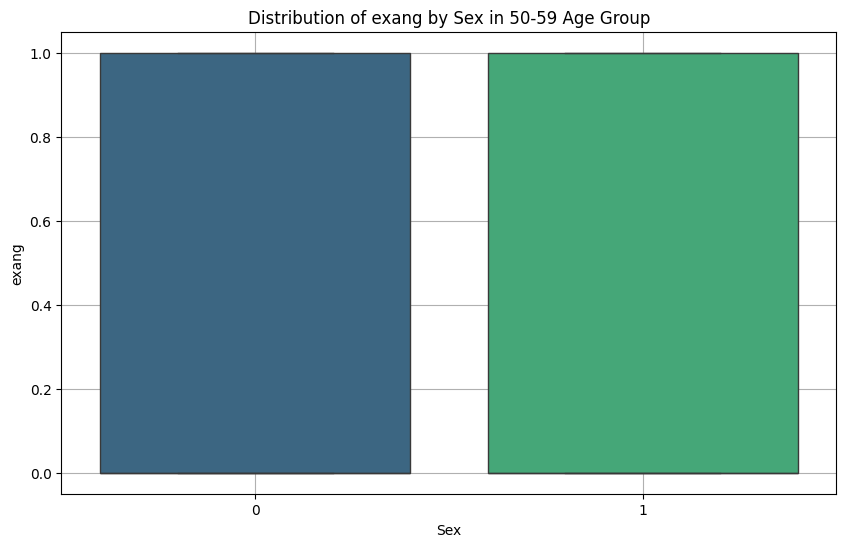

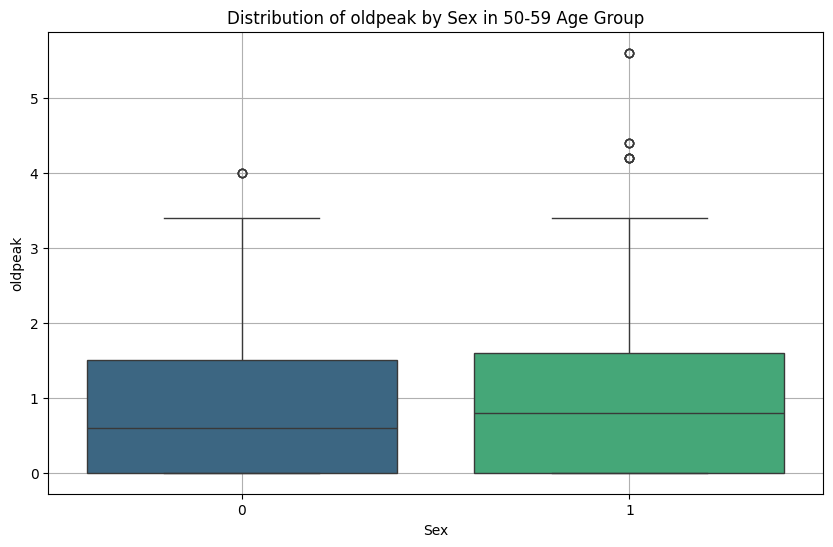

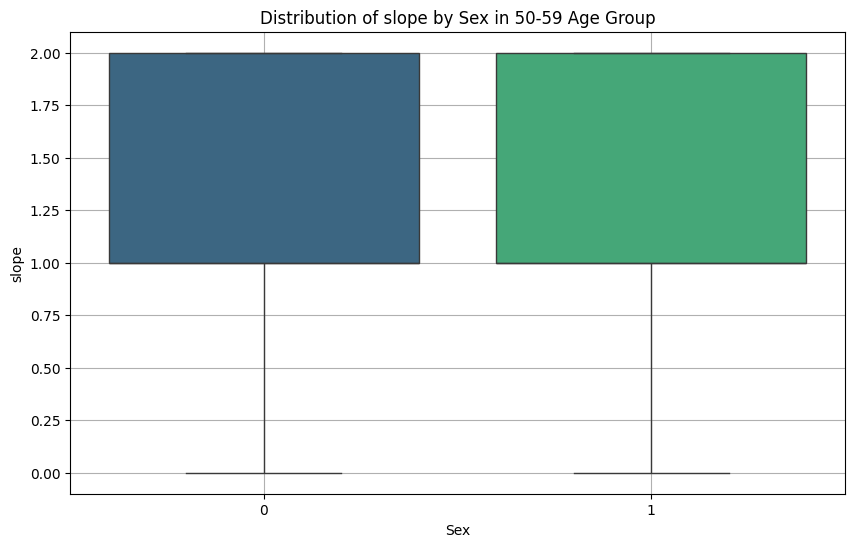

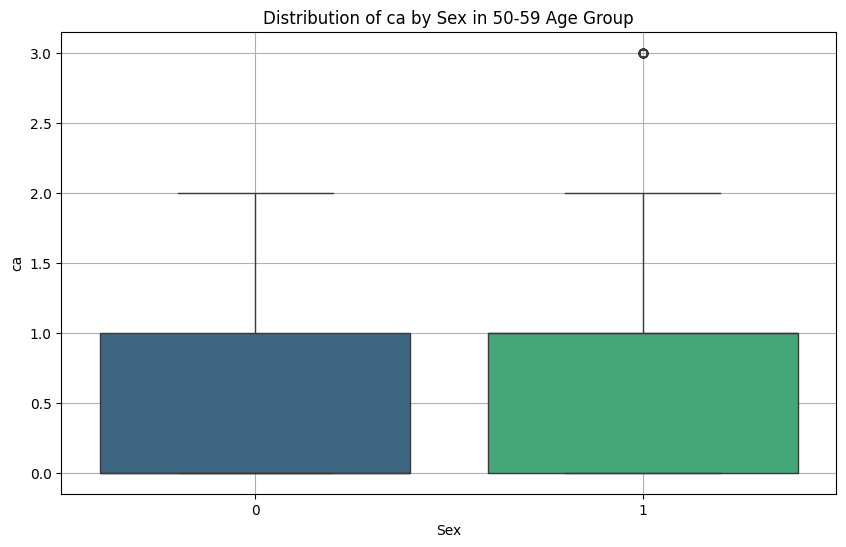

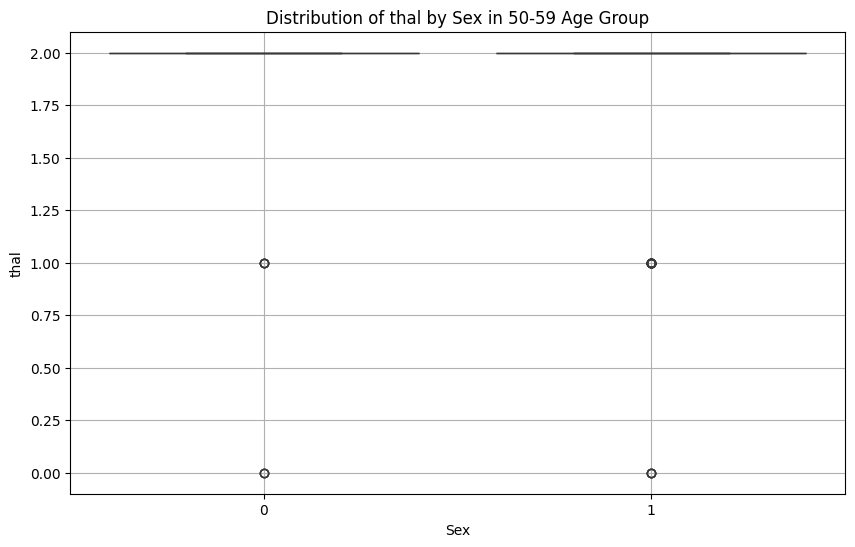

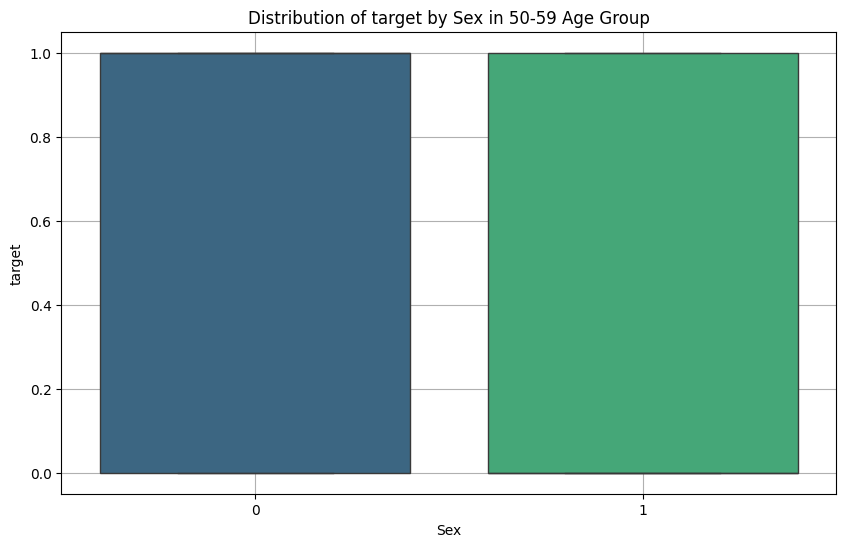

In [ ]:
# Filter for the 50-59 age group
age_group_50_59 = df[(df['age'] >= 50) & (df['age'] < 60)]

# Define the risk factors to explore
risk_factors = ['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Create visualizations for each risk factor by sex
for factor in risk_factors:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=age_group_50_59, x='sex', y=factor, palette='viridis')
    plt.title('Distribution of ' + factor + ' by Sex in 50-59 Age Group')
    plt.xlabel('Sex')
    plt.ylabel(factor)
    plt.grid(True)
    plt.show()

•	CHOLESTEROL (CHOL): Sex=0 (median 260) in this age group tend to have higher cholesterol levels compared to sex=1 (median 230) .

•	Distribution of TRESTBPS by Sex in the 50-59 Age Group: Sex=0, the median resting blood pressure (trestbps) is approximately 140 mmHg, as indicated by the middle line of the box. For sex=1 (represented by 1 on the x-axis), the median resting blood pressure is slightly lower, around 130 mmHg. Thus suggesting greater variability in resting blood pressure among sex=0 in this age group. Blood pressure distribution, indicating some individuals with elevated resting blood pressure.

•	CP: Both sexes portray a uniform distribution in this age group.

•	RESTECG: Both sexes portray a uniform distribution in this age group.

•	EXANG: Both sexes portray a uniform distribution in this age group

•	Distribution of THALACH by Sex in the 50-59 Age Group: For sex=0, the median maximum heart rate achieved (thalach) is around 155 beats per minute (bpm), as indicated by the middle line of the box. For sex=1, the median thalach is slightly lower, around 150 bpm.The box representing the IQR for sex=0 is larger than that of sex=1, suggesting greater variability in maximum heart rate achieved among males in this age group

•	ST Depression (oldpeak): sex=1 exhibit higher levels of ST depression induced by exercise relative to rest, indicating more severe ischemic changes during stress.


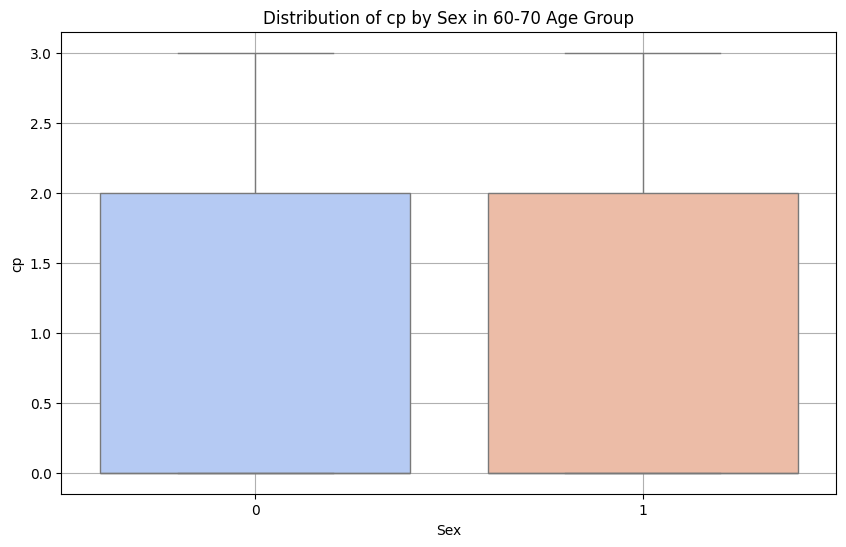

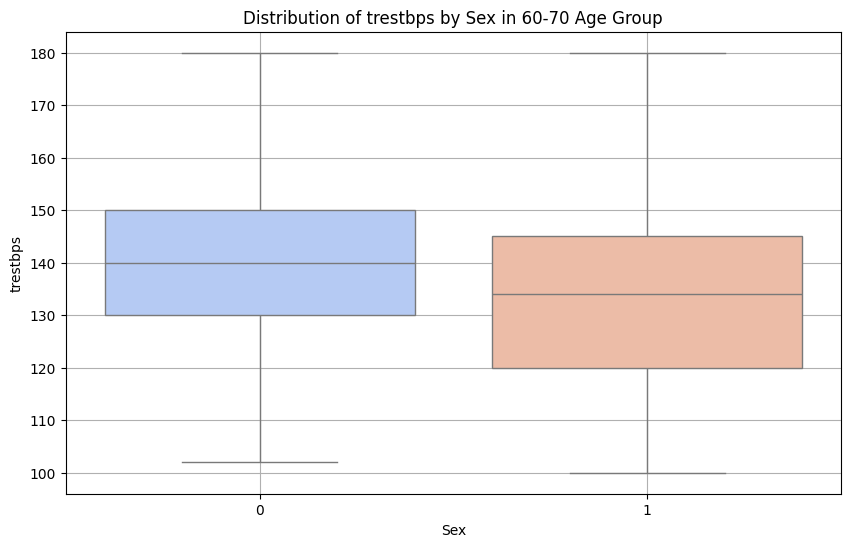

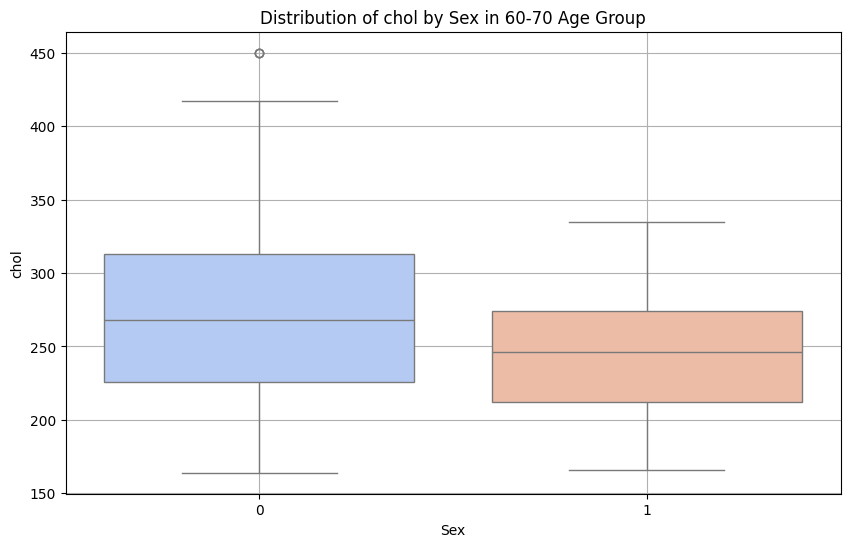

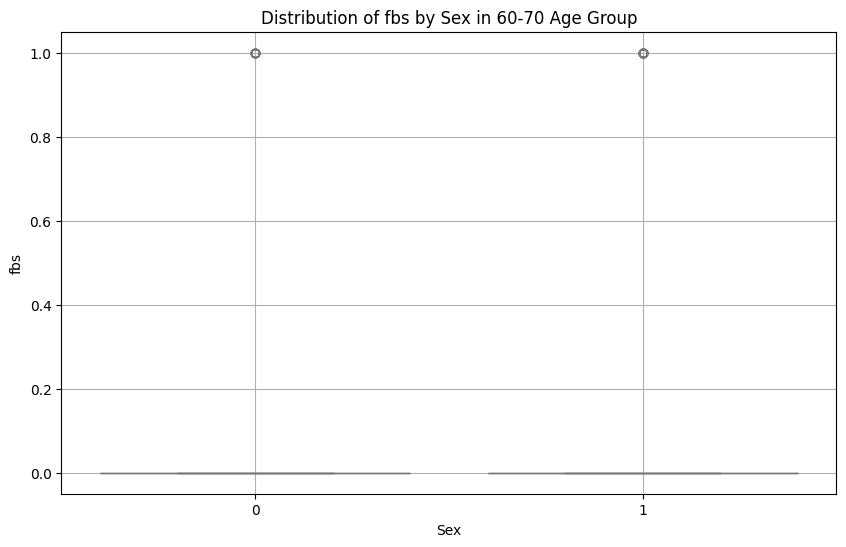

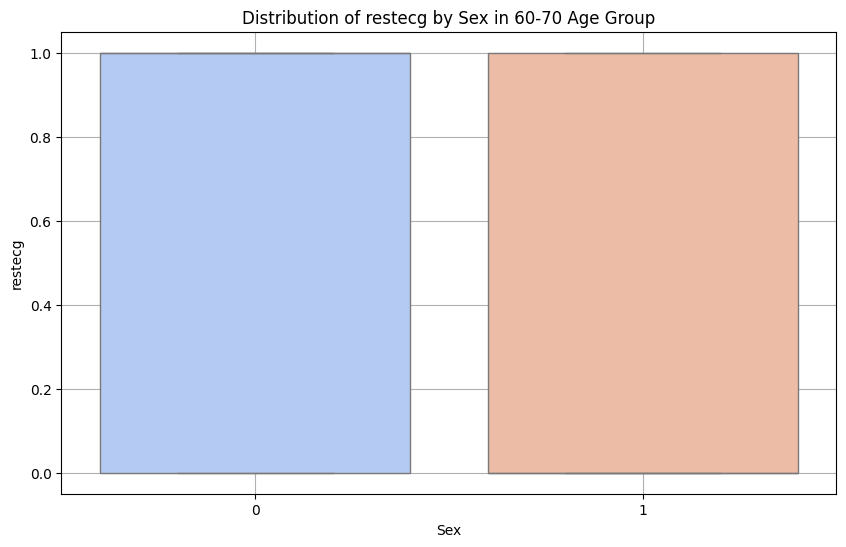

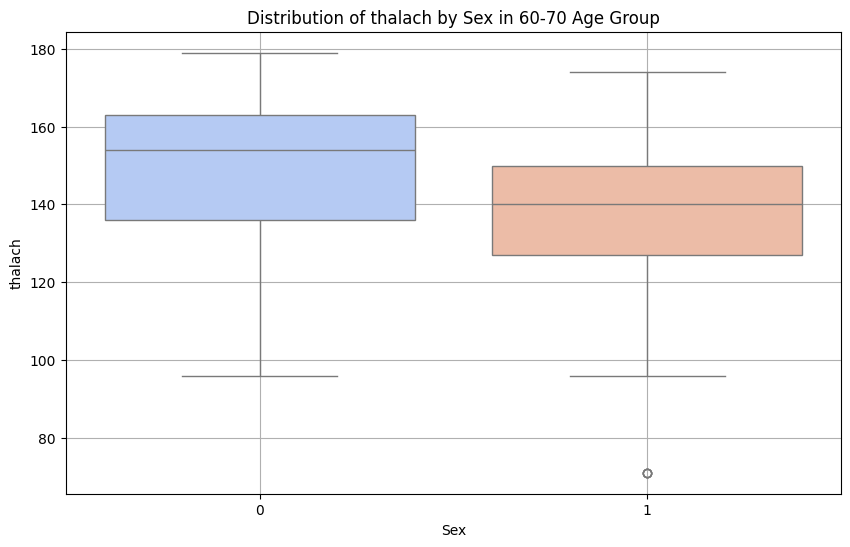

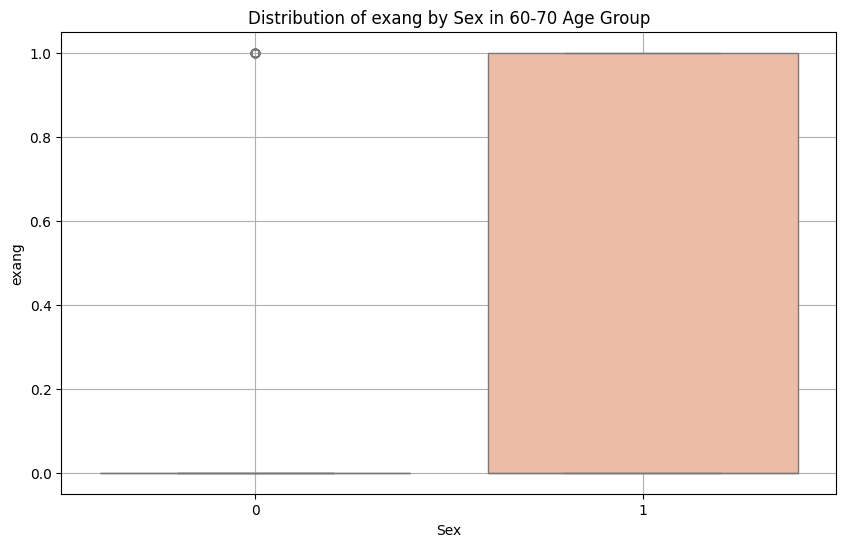

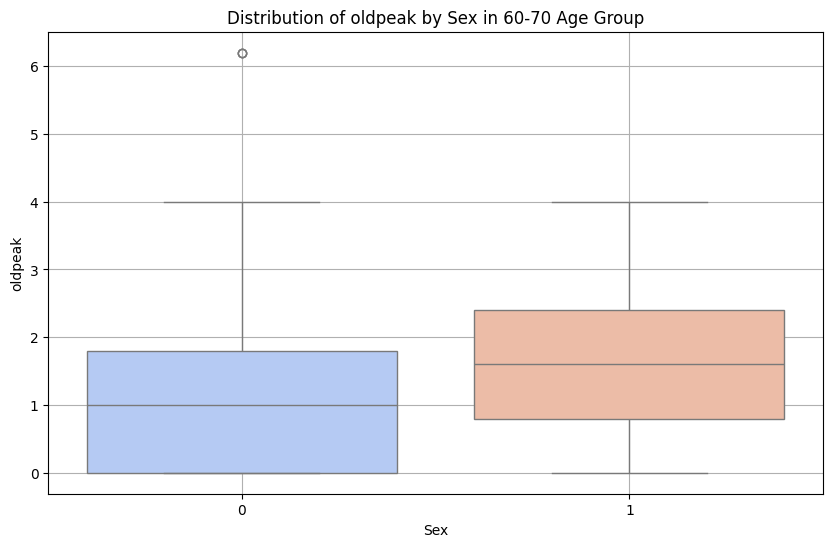

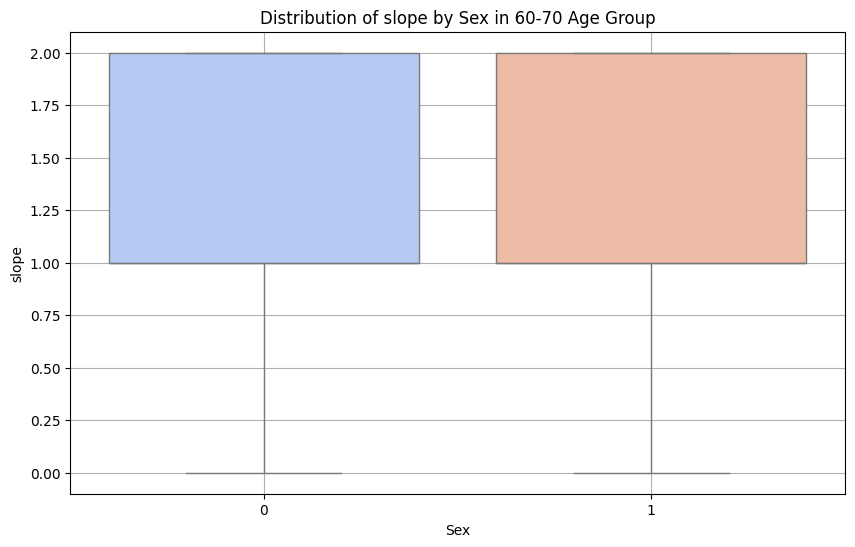

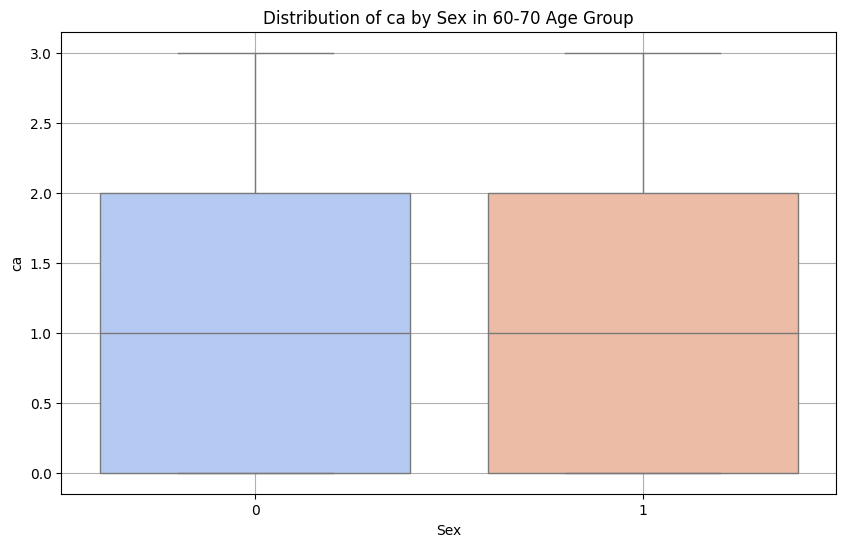

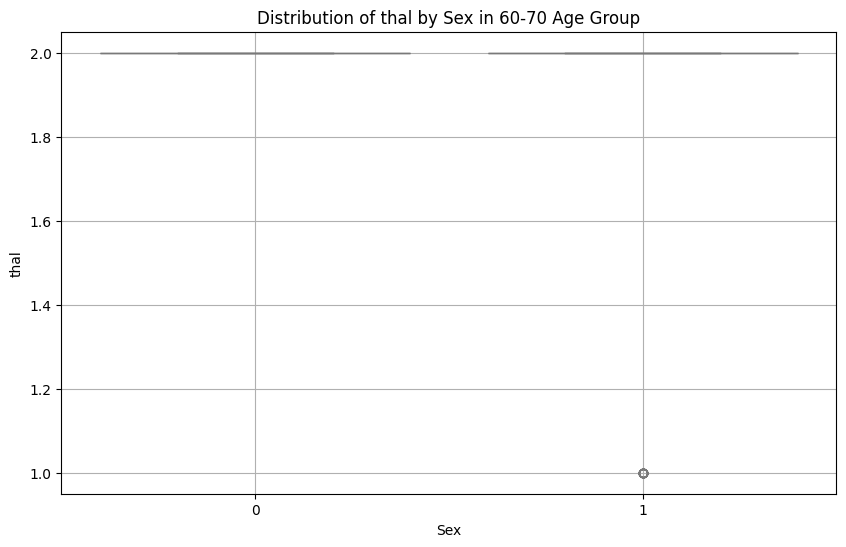

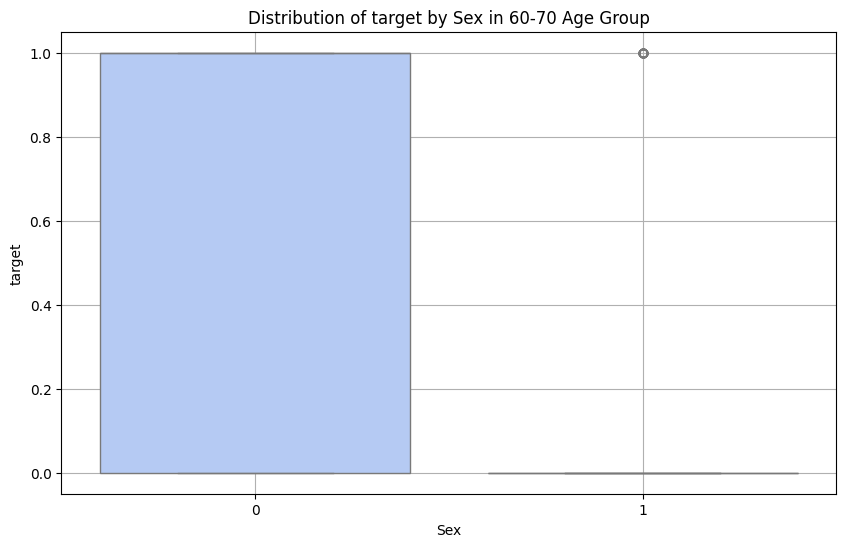

In [ ]:
# Filter for the 60-70 age group
age_group_60_70 = df[(df['age'] >= 60) & (df['age'] <= 70)]

# Define the risk factors to explore
risk_factors = ['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Create visualizations for each risk factor by sex
for factor in risk_factors:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=age_group_60_70, x='sex', y=factor, palette='coolwarm')
    plt.title('Distribution of ' + factor + ' by Sex in 60-70 Age Group')
    plt.xlabel('Sex')
    plt.ylabel(factor)
    plt.grid(True)
    plt.show()

1. 60-70 age group for Thestbps: Thestbps is higher for sex=0 as compared to sex=1

2. 60-70 age group for cholesterol: Cholesterol is higher for sex=1 as compared to sex=0

3. 60-70 age group for thalach: Thalach is higher for sex=0 as compared to sex=1

4. 60-70 age group for exang: Cholesterol is higher for sex=1 and there is no sex=1 for this metrics

5. 60-70 age group for oldpeak: oldpeak is higher for sex=1 as compared to sex=0

6. 60-70 age group for thal: There is no or negligible record of thal for this age group

7. 60-70 age group for target: There is no or negligible record of target for sex=1 for this age group. One can only see a majority for sex=0


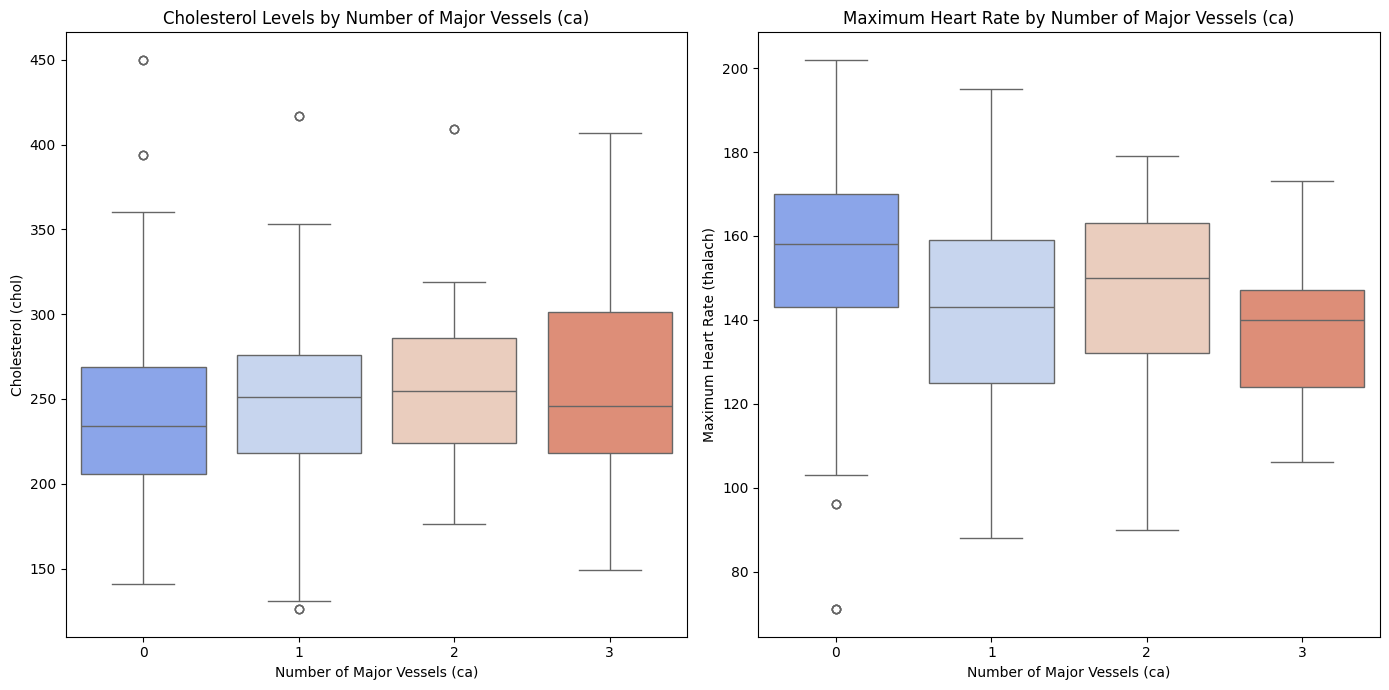

In [ ]:
# Create visualizations for 'chol' and 'thalach' by 'ca'
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='ca', y='chol', palette='coolwarm')
plt.title('Cholesterol Levels by Number of Major Vessels (ca)')
plt.xlabel('Number of Major Vessels (ca)')
plt.ylabel('Cholesterol (chol)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='ca', y='thalach', palette='coolwarm')
plt.title('Maximum Heart Rate by Number of Major Vessels (ca)')
plt.xlabel('Number of Major Vessels (ca)')
plt.ylabel('Maximum Heart Rate (thalach)')

plt.tight_layout()
plt.show()

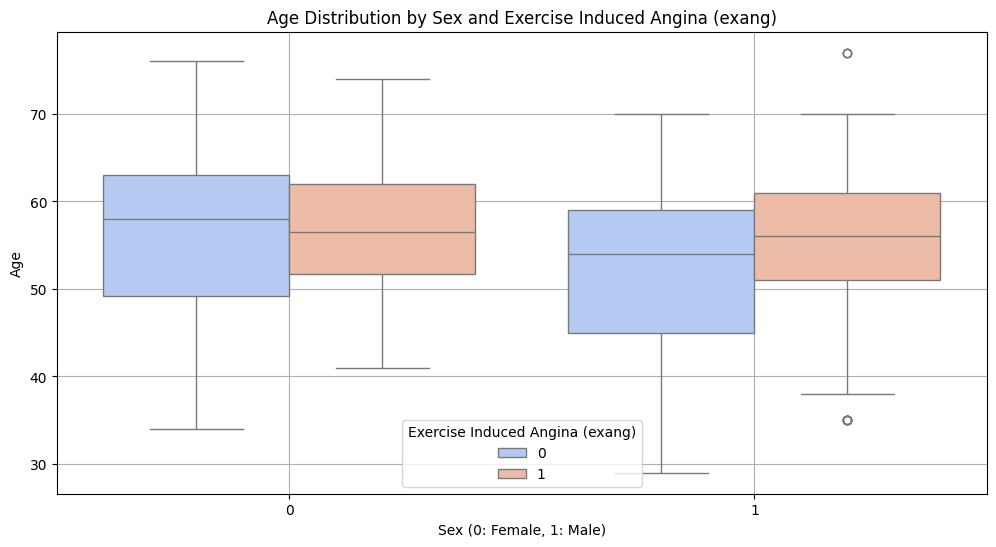

In [ ]:
# Create a visualization for 'age' by 'sex' and 'exang'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='sex', y='age', hue='exang', palette='coolwarm')
plt.title('Age Distribution by Sex and Exercise Induced Angina (exang)')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Age')
plt.legend(title='Exercise Induced Angina (exang)')
plt.grid(True)
plt.show()


Exercise-Induced Angina (exang): Individuals with exercise-induced angina (exang = 1) generally appear to be older across both sexes, suggesting that this condition is more prevalent or more likely to be diagnosed in older individuals.
This visualization helps in understanding how age and sex correlate with the occurrence of exercise-induced angina in heart disease patients

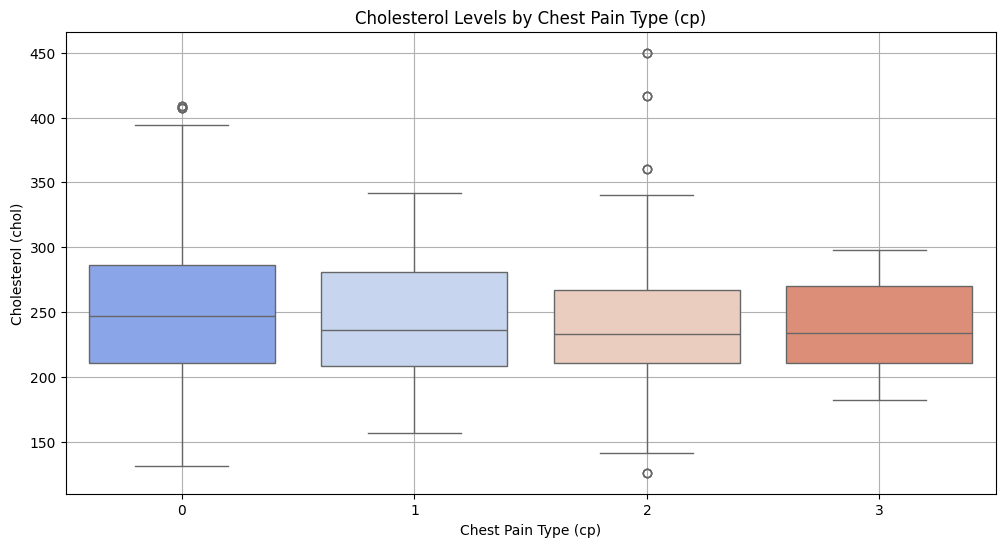

In [ ]:
# Create a visualization for 'cp' (Chest Pain Type) vs 'chol' (Cholesterol)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cp', y='chol', palette='coolwarm')
plt.title('Cholesterol Levels by Chest Pain Type (cp)')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Cholesterol (chol)')
plt.grid(True)
plt.show()

Observations:
Cholesterol Levels: There is some variation in cholesterol levels across different types of chest pain. Notably, type 0 chest pain (typical angina) tends to have slightly higher cholesterol levels on average compared to other types.
Chest Pain Type (cp): The box plots indicate that while there is some overlap, certain types of chest pain (like type 2, atypical angina) tend to have lower median cholesterol levels.
This visualization helps in understanding the relationship between the type of chest pain experienced by patients and their cholesterol levels, which can be crucial for diagnosis and treatment planning.

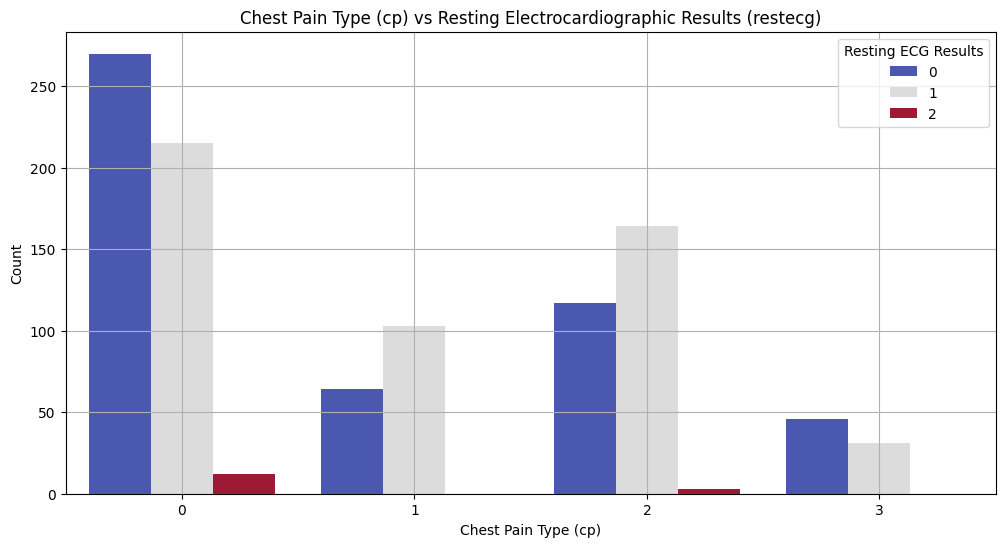

In [ ]:
# Create a visualization for 'cp' (Chest Pain Type) vs 'restecg' (Resting Electrocardiographic Results)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='cp', hue='restecg', palette='coolwarm')
plt.title('Chest Pain Type (cp) vs Resting Electrocardiographic Results (restecg)')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Count')
plt.legend(title='Resting ECG Results')
plt.grid(True)
plt.show()

Observations:
Chest Pain Type (cp): Different types of chest pain show varying distributions of resting ECG results.
Resting ECG Results (restecg):
Type 0 ECG (normal) is the most common across all chest pain types, but particularly so in patients with type 1 type 3 chest pain (asymptomatic).
Type 1 ECG (having ST-T wave abnormality) appears more frequently in patients with type 1 and type 2 chest pain (atypical angina).
Type 2 ECG (showing probable or definite left ventricular hypertrophy by Estes' criteria) is less common and is observed only across chest pain 0 and 2.
This visualization helps in understanding how different types of chest pain correlate with electrocardiographic findings, which can be crucial for diagnosing and managing heart conditions.

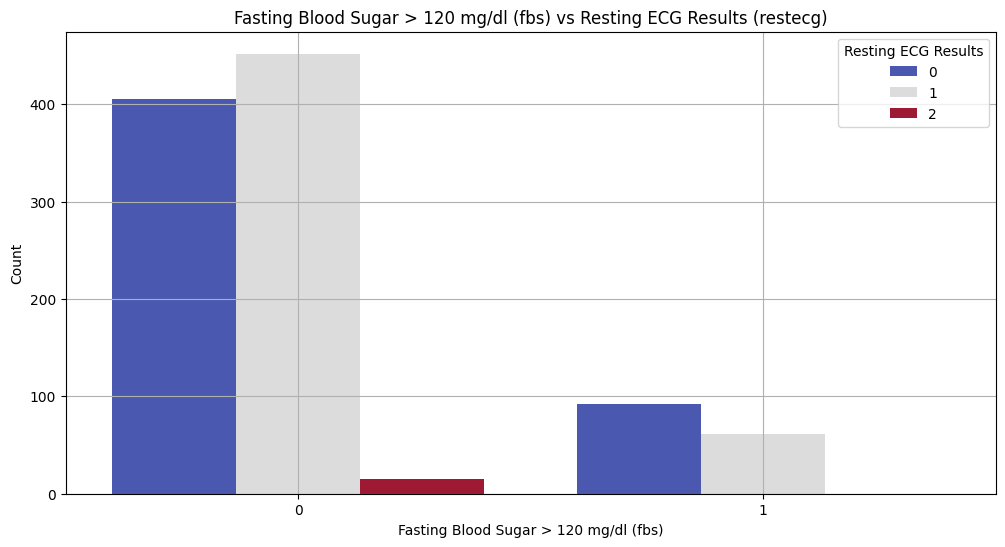

In [ ]:
# Create a visualization for 'fbs' (Fasting Blood Sugar > 120 mg/dl) vs 'restecg' (Resting Electrocardiographic Results)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='fbs', hue='restecg', palette='coolwarm')
plt.title('Fasting Blood Sugar > 120 mg/dl (fbs) vs Resting ECG Results (restecg)')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (fbs)')
plt.ylabel('Count')
plt.legend(title='Resting ECG Results')
plt.grid(True)
plt.show()

Observations:
Fasting Blood Sugar (fbs):

The majority of patients, whether their fasting blood sugar is above or below 120 mg/dl, tend to have a normal resting ECG (restecg type 0).
Patients with fasting blood sugar above 120 mg/dl (fbs = 1) show a slightly higher proportion of abnormal ECG results (restecg types 0 and 1) compared to those with lower sugar levels.
Resting ECG Results (restecg):

Normal ECG (type 0) is predominant in both groups.
ST-T wave abnormality (type 1) and probable left ventricular hypertrophy (type 2) are more frequently observed in patients with higher fasting blood sugar.
This visualization helps in understanding how fasting blood sugar levels correlate with electrocardiographic findings, which can be important for assessing cardiovascular risk in diabetic and non-diabetic patients.

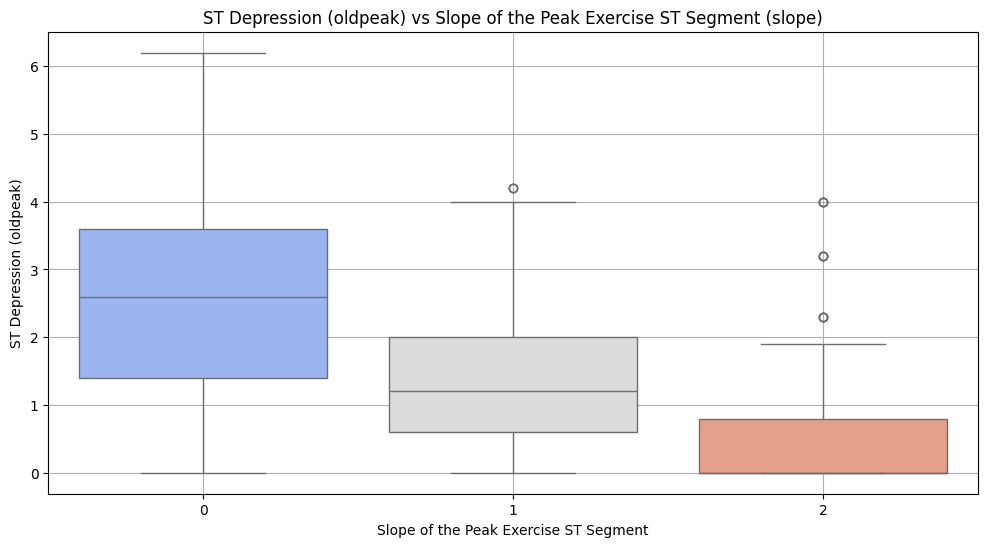

In [ ]:
# Create a visualization for 'oldpeak' (ST depression induced by exercise relative to rest) vs 'slope' (the slope of the peak exercise ST segment)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='slope', y='oldpeak', palette='coolwarm')
plt.title('ST Depression (oldpeak) vs Slope of the Peak Exercise ST Segment (slope)')
plt.xlabel('Slope of the Peak Exercise ST Segment')
plt.ylabel('ST Depression (oldpeak)')
plt.grid(True)
plt.show()

Observations:
ST Depression (oldpeak):

There is a noticeable trend where higher values of ST depression are associated with a slope of 1 (upsloping).
The median ST depression decreases as the slope category from 1 (upsloping) to 2 (downsloping).
Slope of the Peak Exercise ST Segment (slope):

Patients with a downsloping ST segment (slope 1 and 2) generally exhibit lower levels of ST depression compared to those with an upsloping ST segment.
This visualization helps in understanding how the slope of the peak exercise ST segment correlates with the degree of ST depression, which is crucial for diagnosing specific types of heart conditions related to exercise tolerance.



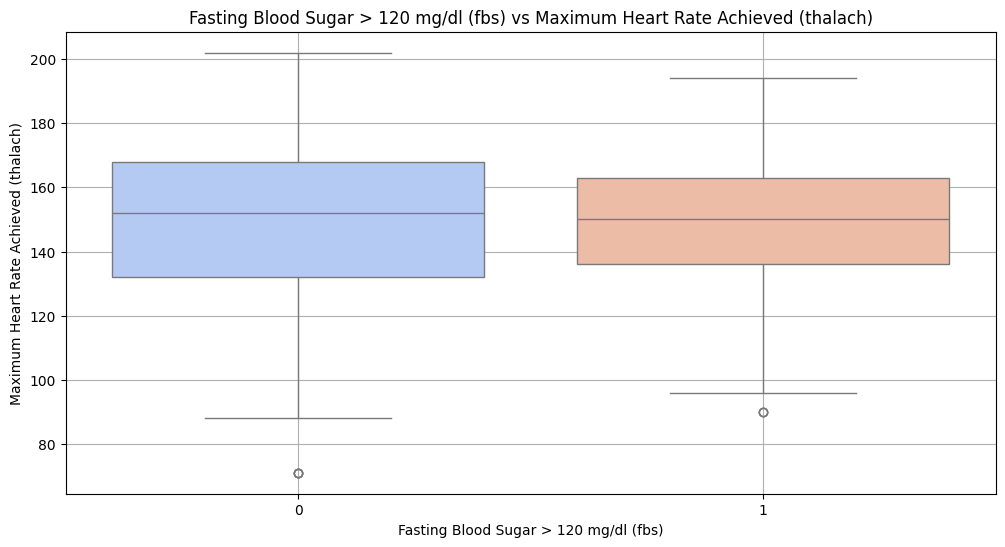

In [ ]:
# Create a boxplot for 'fbs' (Fasting Blood Sugar > 120 mg/dl) vs 'thalach' (maximum heart rate achieved)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='fbs', y='thalach', palette='coolwarm')
plt.title('Fasting Blood Sugar > 120 mg/dl (fbs) vs Maximum Heart Rate Achieved (thalach)')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (fbs)')
plt.ylabel('Maximum Heart Rate Achieved (thalach)')
plt.grid(True)
plt.show()

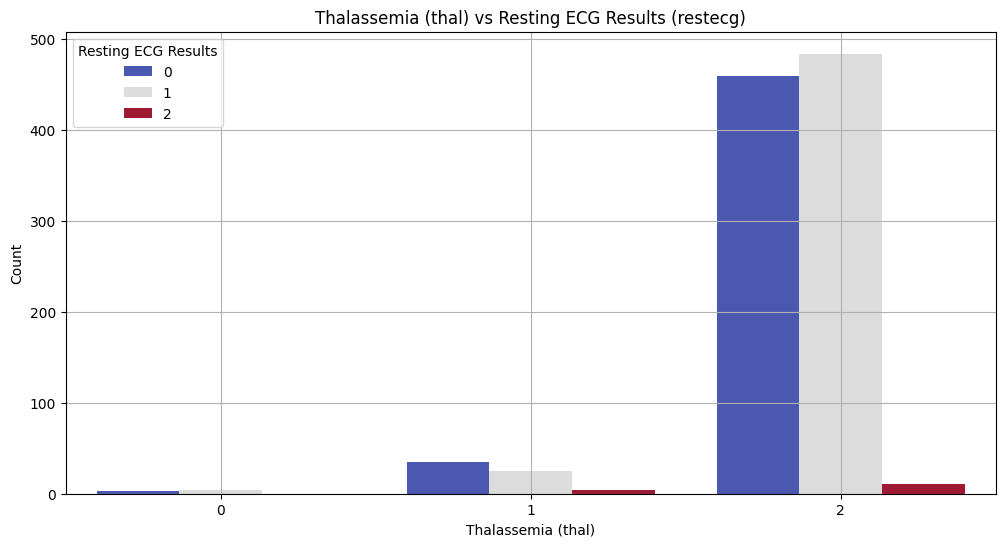

In [ ]:
# Thalassemia (thal) vs Resting Electrocardiographic Results (restecg)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='thal', hue='restecg', palette='coolwarm')
plt.title('Thalassemia (thal) vs Resting ECG Results (restecg)')
plt.xlabel('Thalassemia (thal)')
plt.ylabel('Count')
plt.legend(title='Resting ECG Results')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Number of Major Vessels (ca) vs Resting ECG Results (restecg)')

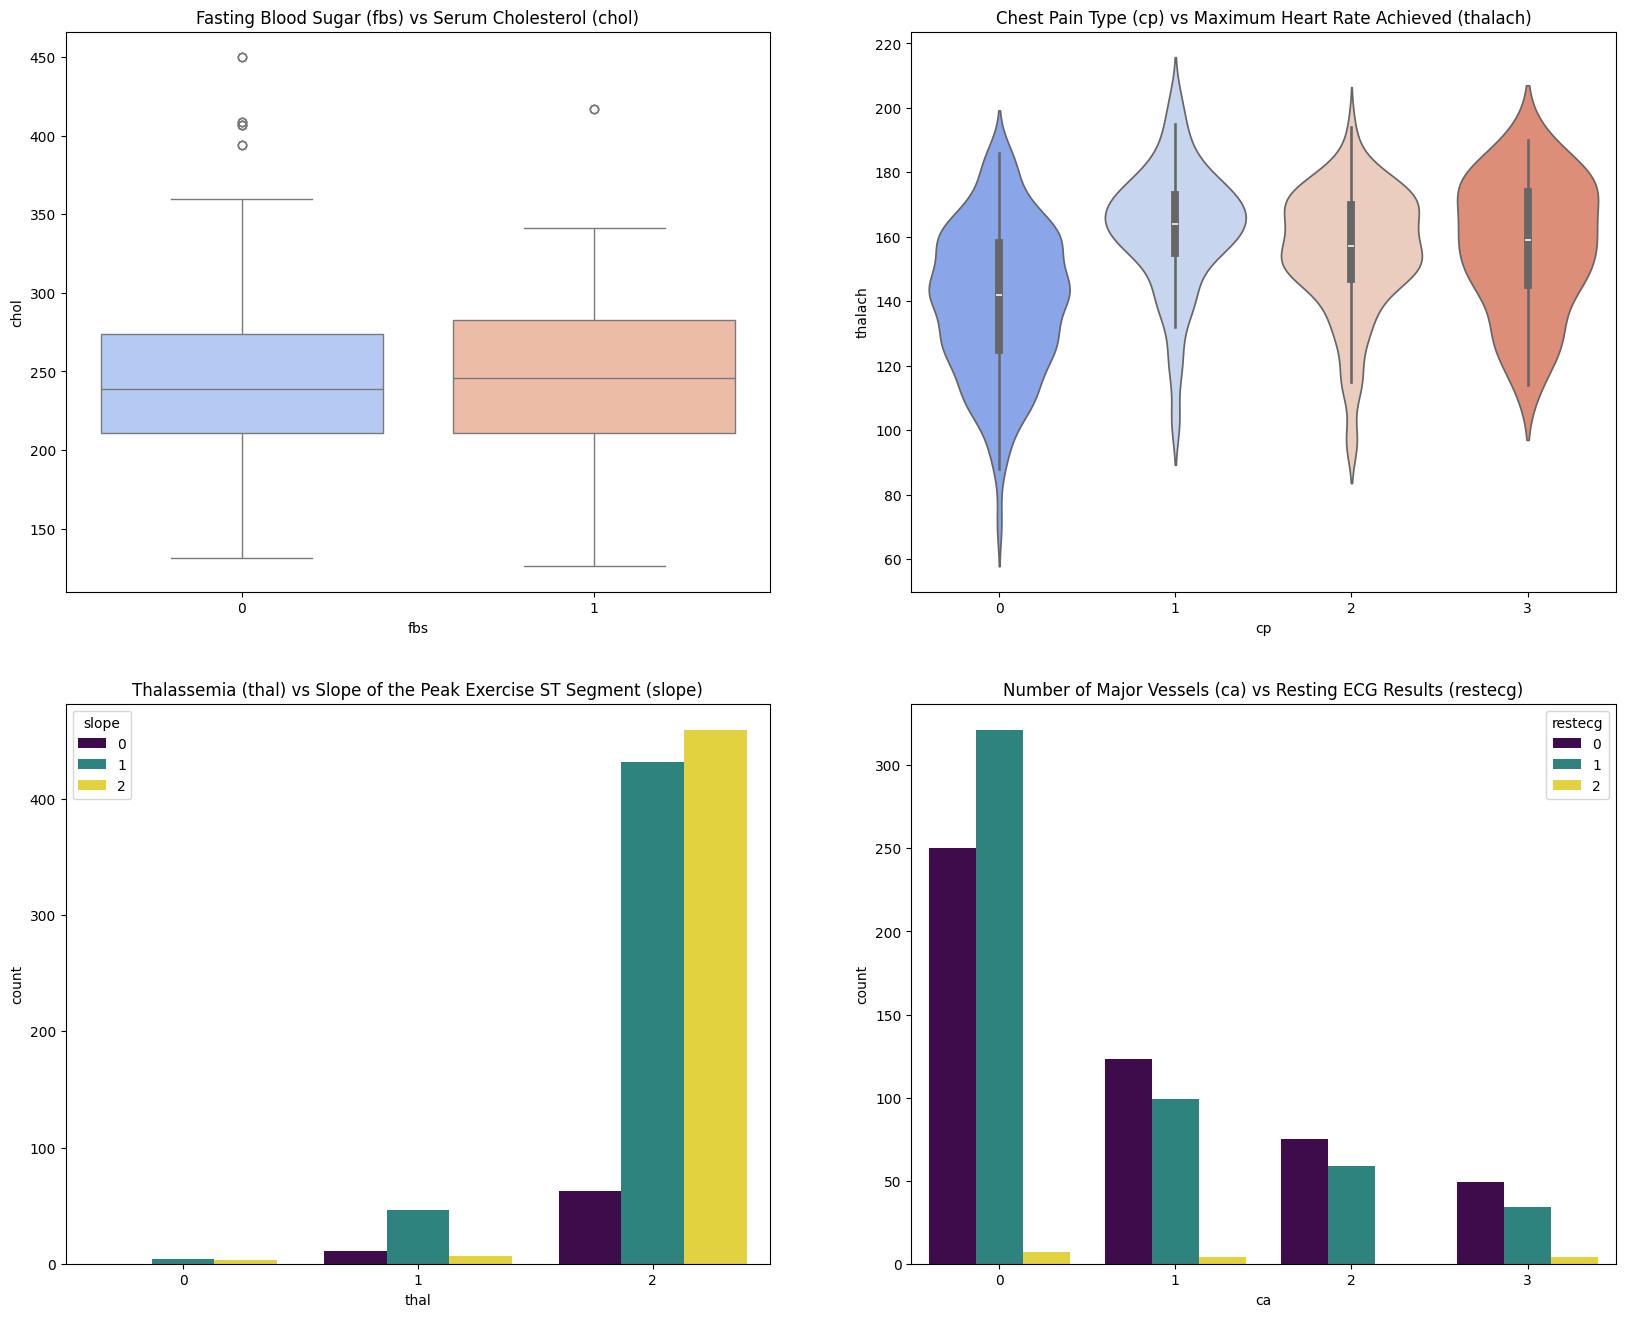

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 16))
# Boxplot for 'fbs' vs 'chol'
sns.boxplot(x='fbs', y='chol', data=df, ax=axs[0, 0], palette='coolwarm')
axs[0, 0].set_title('Fasting Blood Sugar (fbs) vs Serum Cholesterol (chol)')

# Violin plot for 'cp' vs 'thalach'
sns.violinplot(x='cp', y='thalach', data=df, ax=axs[0, 1], palette='coolwarm')
axs[0, 1].set_title('Chest Pain Type (cp) vs Maximum Heart Rate Achieved (thalach)')

# Count plot for 'thal' vs 'slope'
sns.countplot(data=df, x='thal', hue='slope', ax=axs[1, 0], palette='viridis')
axs[1, 0].set_title('Thalassemia (thal) vs Slope of the Peak Exercise ST Segment (slope)')

# Count plot for 'ca' vs 'restecg'
sns.countplot(data=df, x='ca', hue='restecg', ax=axs[1, 1], palette='viridis')
axs[1, 1].set_title('Number of Major Vessels (ca) vs Resting ECG Results (restecg)')

•	Fbs vs Chol: There is no disease as a majority for all categories for thal and majority of distribution is on the higher side for old peak across all categories for no disease. We can conclude that thal and old peak on the higher side have no heart disease. The highest likelihood of heart disease is found for category 2 for thal, the peak being around 280 for old peak.

•	Cp vs thalach: Thalach is highest for cp category 1 and lowest for category 0

Thal vs slope: Slope category 1 is high across all levels thal levels accept thal category 2, which sees the highest distribution peak among all the thal categories.


Ca vs restecg: restecg category 0 is high across all levels ca levels accept ca category 0, which sees the highest distribution peak among all the ca categories. restecg category 2 is lowest across all ca categories.



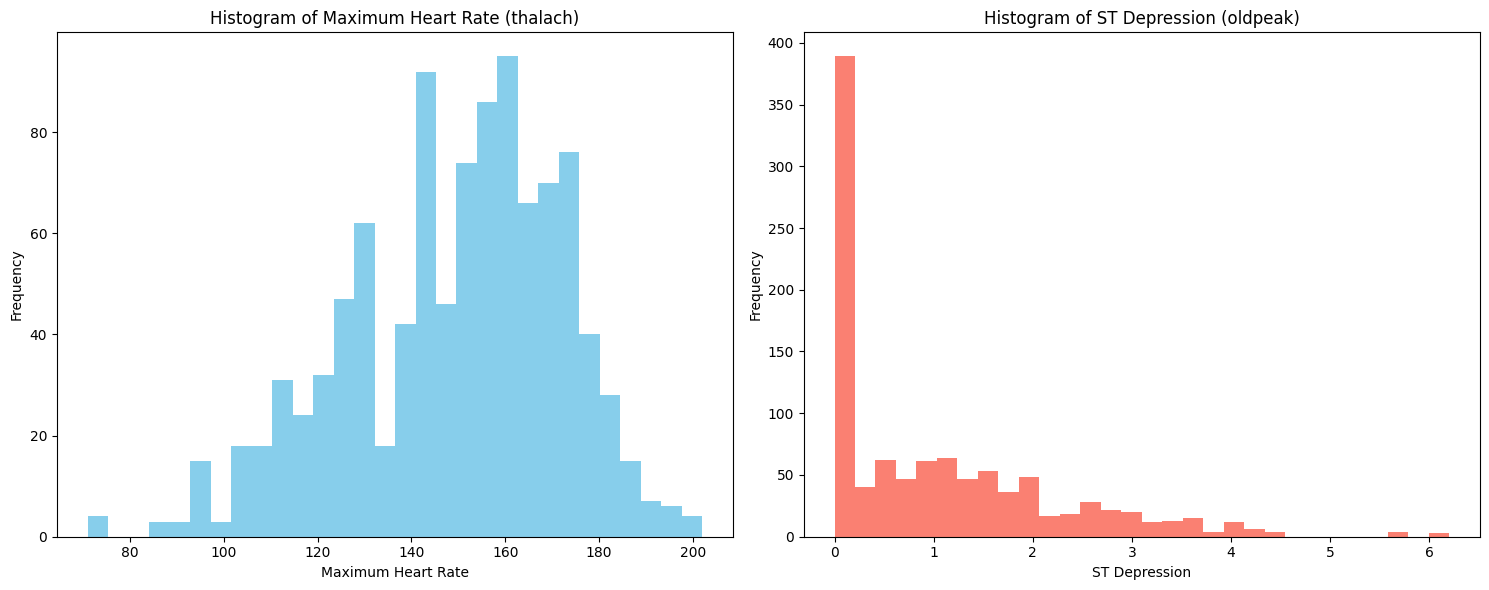

In [ ]:
# Plotting histograms for 'thalach' and 'oldpeak' columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Histogram for 'thalach'
df['thalach'].plot(kind='hist', bins=30, ax=axs[0], color='skyblue')
axs[0].set_title('Histogram of Maximum Heart Rate (thalach)')
axs[0].set_xlabel('Maximum Heart Rate')
axs[0].set_ylabel('Frequency')

# Histogram for 'oldpeak'
df['oldpeak'].plot(kind='hist', bins=30, ax=axs[1], color='salmon')
axs[1].set_title('Histogram of ST Depression (oldpeak)')
axs[1].set_xlabel('ST Depression')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

1. The histogram for thalach illustrates a wide and high frequency of heart rates with a concentration around 145-175 beats per minute.There are peaks indicating common heart rate values where most data points are clustered.The distribution shows a right-skewed pattern, indicating that lower heart rates are less common in the dataset.

2. Oldpeak Histogram: This histogram illustrates the distribution of ST depression values, showing that most values are clustered near zero, indicating minimal depression. The distribution is left-skewed, with fewer instances of higher ST depression values.

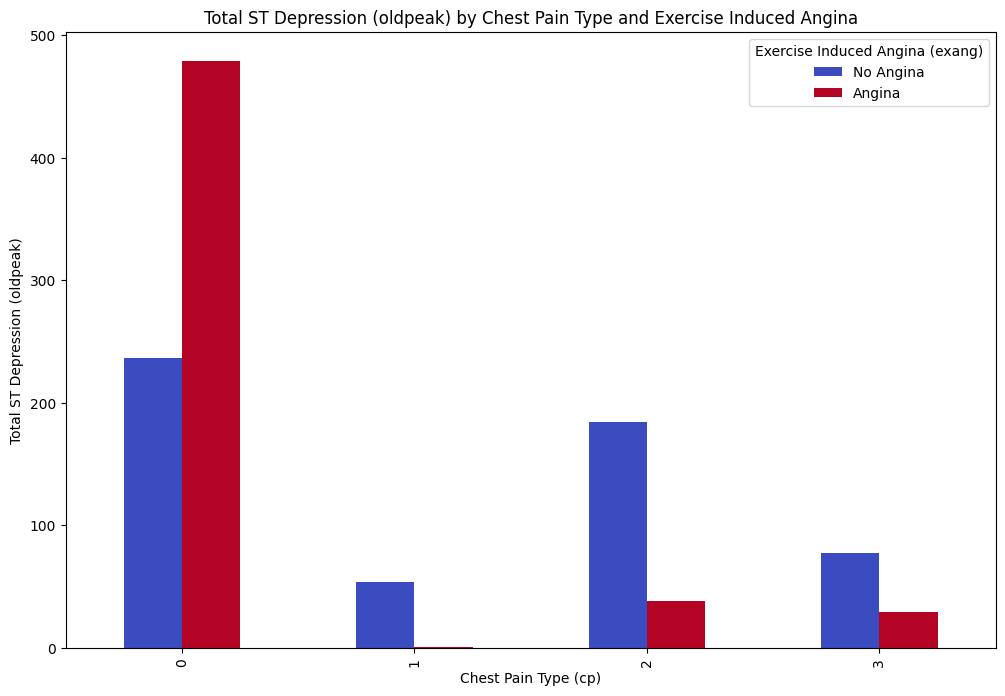

In [ ]:
grouped_data = df.groupby(['cp', 'exang'])['oldpeak'].sum().unstack()

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data.plot(kind='bar', ax=ax, colormap='coolwarm')
ax.set_title('Total ST Depression (oldpeak) by Chest Pain Type and Exercise Induced Angina')
ax.set_xlabel('Chest Pain Type (cp)')
ax.set_ylabel('Total ST Depression (oldpeak)')
ax.legend(title='Exercise Induced Angina (exang)', labels=['No Angina', 'Angina'])
plt.show()

The chart compares the total ST depression for different types of chest pain, differentiated by whether exercise induced angina was present (Angina) or not (No Angina).
Each set of bars represents a different chest pain type, showing the impact of angina on the total ST depression observed.
This visualization helps in understanding the relationship between chest pain type, the presence of angina, and the total ST depression recorded in patients.

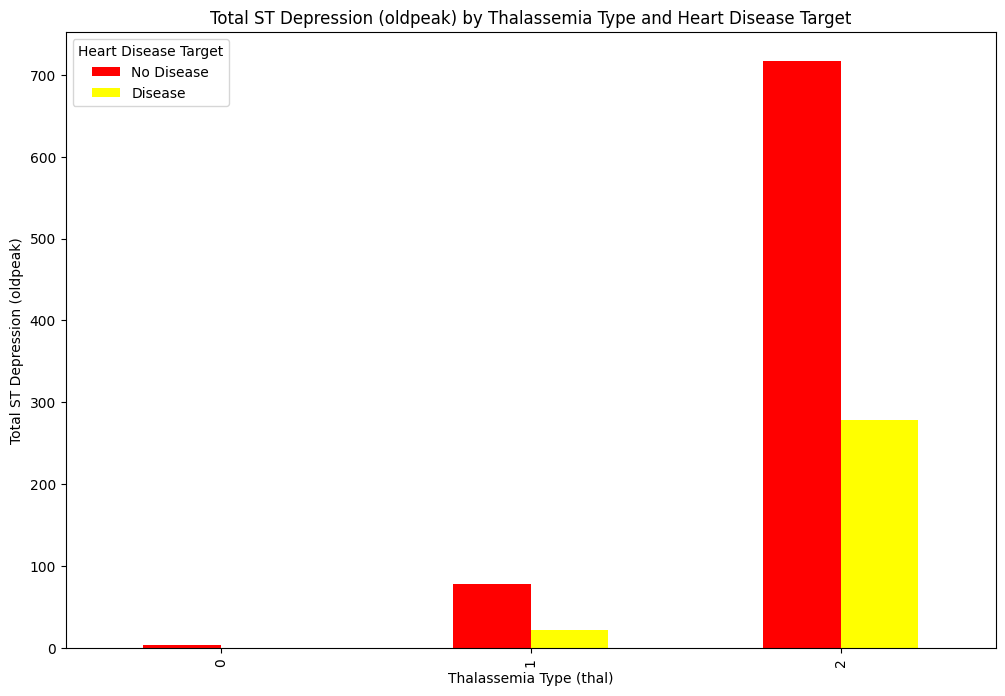

In [ ]:
# Creating a grouped bar chart for 'target', 'thal', and 'oldpeak' without using mean values
# Grouping data by 'thal' and using 'target' as hue to compare 'oldpeak' values
grouped_data = df.groupby(['thal', 'target'])['oldpeak'].sum().unstack()

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data.plot(kind='bar', ax=ax, colormap='autumn')
ax.set_title('Total ST Depression (oldpeak) by Thalassemia Type and Heart Disease Target')
ax.set_xlabel('Thalassemia Type (thal)')
ax.set_ylabel('Total ST Depression (oldpeak)')
ax.legend(title='Heart Disease Target', labels=['No Disease', 'Disease'])
plt.show()

The chart compares the total ST depression for different types of thalassemia, differentiated by whether heart disease was diagnosed (Disease) or not (No Disease).
Each set of bars represents a different thalassemia type, showing the impact of heart disease diagnosis on the total ST depression observed.
This visualization helps in understanding the relationship between thalassemia type, heart disease diagnosis, and the total ST depression recorded in patients.

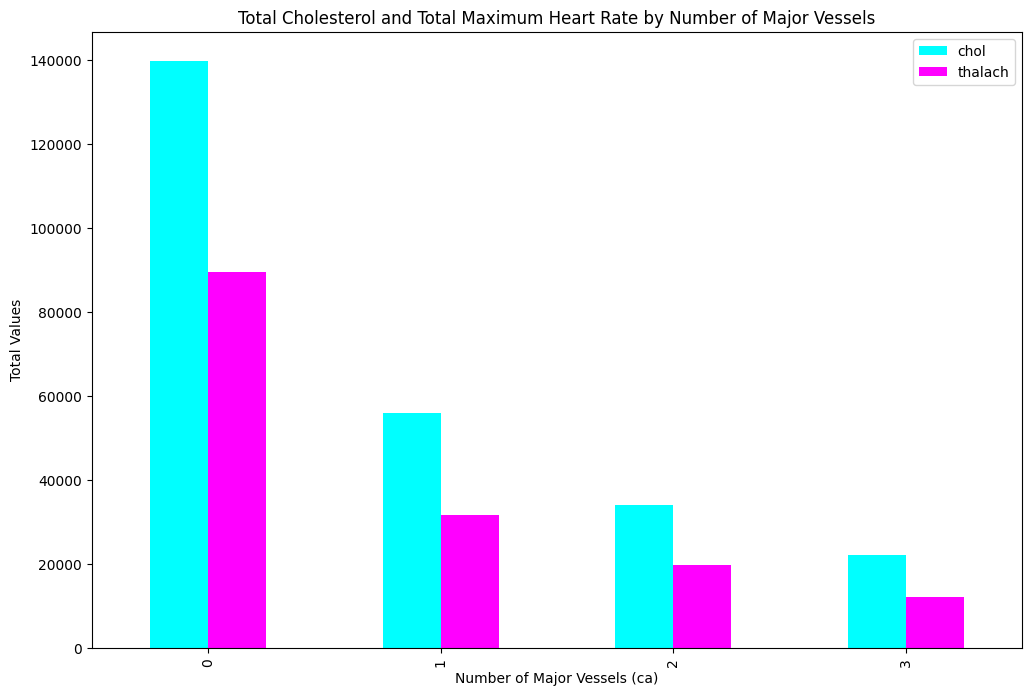

In [ ]:
# Grouping data by 'ca' and summing 'chol' and 'thalach'
summed_data = df.groupby('ca')[['chol', 'thalach']].sum()

# Plotting the data using a bar chart
fig, ax = plt.subplots(figsize=(12, 8))
summed_data.plot(kind='bar', ax=ax, colormap='cool')
ax.set_title('Total Cholesterol and Total Maximum Heart Rate by Number of Major Vessels')
ax.set_xlabel('Number of Major Vessels (ca)')
ax.set_ylabel('Total Values')
plt.show()

In [ ]:
# Assuming df is your DataFrame containing the data
df = df.drop(columns=['age_group'])
#note:this was an extra column created for visualization, hence not needed anymore

In [ ]:
#Import the required Library
from sklearn.model_selection import train_test_split

In [ ]:
#Put all the feature variables in X
x = df.drop(columns=['target'])

In [ ]:
#Put the target variable in y
y=df['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
#Split the dataset into 70% train and 30% test
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
#Scaling
# There are a few numeric variables present in the dataset which have
# different scales. Scaling these variables.
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Scale the 4 numeric features present in the dataset
scaler = MinMaxScaler()
x_train[['age', 'trestbps', 'chol', 'thalach']] = scaler.fit_transform(x_train[['age', 'trestbps', 'chol', 'thalach']])
x_train.head()

age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
542  0.687500    0   0  0.433962  0.827160    0        0  0.656489      0   
278  0.541667    1   0  0.622642  0.503086    0        0  0.564885      1   
218  0.354167    1   0  0.433962  0.570988    0        1  0.374046      1   
374  0.354167    0   2  0.452830  0.157407    0        0  0.679389      1   
759  0.666667    0   0  0.339623  0.629630    0        0  0.748092      0   

     oldpeak  slope  ca  thal  
542      1.2      1   0     2  
278      0.8      1   1     2  
218      1.8      1   2     2  
374      1.4      0   0     2  
759      0.0      2   0     2

In [ ]:
# Scale the 4 numeric features present in the dataset
scaler = MinMaxScaler()
x_test[['age', 'trestbps', 'chol', 'thalach']] = scaler.fit_transform(x_test[['age', 'trestbps', 'chol', 'thalach']])
x_test.head()

age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
960  0.479167    0   2  0.396226  0.240550    0        0  0.710526      0   
48   0.770833    0   2  0.490566  0.522337    0        0  0.561404      0   
886  0.666667    1   0  0.245283  0.460481    0        1  0.456140      1   
981  0.208333    1   0  0.226415  0.319588    0        1  0.456140      0   
973  0.458333    1   2  0.292453  0.408935    1        0  0.684211      0   

     oldpeak  slope  ca  thal  
960      0.1      1   0     2  
48       0.0      1   1     2  
886      3.6      1   1     2  
981      1.2      1   0     2  
973      2.4      1   0     2

In [ ]:
#Import 'LogisticRegression and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()


In [ ]:
#Import RFE and select 14 variables
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming logreg is your logistic regression model
logreg = LogisticRegression()

# Specify the number of features to select (14 in this case)
num_features_to_select = 14

# Initialize RFE
rfe = RFE(logreg, n_features_to_select=num_features_to_select)

# Fit RFE on your training data
rfe.fit(x_train, y_train)


RFE(estimator=LogisticRegression(), n_features_to_select=14)

In [ ]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [ ]:
# Let's take a look at which features have been selected by RFE
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('age', True, 1),
 ('sex', True, 1),
 ('cp', True, 1),
 ('trestbps', True, 1),
 ('chol', True, 1),
 ('fbs', True, 1),
 ('restecg', True, 1),
 ('thalach', True, 1),
 ('exang', True, 1),
 ('oldpeak', True, 1),
 ('slope', True, 1),
 ('ca', True, 1),
 ('thal', True, 1)]

In [ ]:
col = x_train.columns[rfe.support_]

In [ ]:
x_train=x_train[col]

In [ ]:
#assessing with stat model
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
logm = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  717
Model:                            GLM   Df Residuals:                      703
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -266.41
Date:                Tue, 30 Apr 2024   Deviance:                       532.81
Time:                        14:07:06   Pearson chi2:                     583.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4744
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1500      1.121      1.918      0.055      -0.047       4.347
age           -0.5902      0.692     -0.853      0.394      -1.947       0.766
sex           -2.0784      0.292     -7.120      0.000      -2.651      -1.506
cp             0.7402      0.115      6.464      0.000       0.516       0.965
trestbps      -1.5740      0.701     -2.246      0.025      -2.947      -0.201
chol          -2.5401      0.863     -2.944      0.003      -4.231      -0.849
fbs            0.5826      0.341      1.710      0.087      -0.085       1.250
restecg        0.3646      0.218      1.675      0.094      -0.062       0.791
thalach        2.5990      0.830      3.131      0.002       0.972       4.226
exang         -1.0530      0.262     -4.024      0.000      -1.566      -0.540
oldpeak       -0.5293      0.133     -3.994      0.000      -0.789      -0.270
slope          0.7131      0.219      3.250      0.001       0.283       1.143
ca            -0.8521      0.127     -6.716      0.000      -1.101      -0.603
thal          -0.5113      0.408     -1.253      0.210      -1.311       0.289
==============================================================================
"""

In [ ]:
#checking VIF
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
12      thal  30.29
7    thalach  15.65
0        age  11.13
10     slope   9.33
4       chol   7.47
3   trestbps   6.54
1        sex   3.34
9    oldpeak   3.10
2         cp   2.34
6    restecg   2.10
8      exang   2.02
11        ca   1.92
5        fbs   1.28

In [ ]:
# Getting the predicted values on the train set
# Add a constant to the x_test matrix
x_train_sm = sm.add_constant(x_train)

# Check the number of columns in x_test_sm and the model's params
print("Number of columns in x_test_sm:", x_train_sm.shape[1])
print("Number of coefficients in the model:", len(res.params))

# Predict probabilities on the test set
y_train_pred = res.predict(x_train_sm)

# Display the first 10 predicted probabilities
print(y_train_pred[:10])

Number of columns in x_test_sm: 14
Number of coefficients in the model: 14
542    0.430879
278    0.024701
218    0.007008
374    0.778676
759    0.877683
111    0.171368
892    0.026591
105    0.033346
548    0.968970
413    0.002770
dtype: float64


In [ ]:
#reshaping
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.43087937, 0.02470066, 0.0070081 , 0.77867648, 0.87768275,
       0.17136763, 0.02659123, 0.03334644, 0.96896975, 0.00277032])

In [ ]:
#creating a dataframe with conversion flag n predicted probability
y_train_pred_final = pd.DataFrame({'Target':y_train.values, 'Target_prob':y_train_pred})
y_train_pred_final.head()

Target  Target_prob
0       1     0.430879
1       0     0.024701
2       0     0.007008
3       1     0.778676
4       0     0.877683

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Target_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Target  Target_prob  predicted
0       1     0.430879          0
1       0     0.024701          0
2       0     0.007008          0
3       1     0.778676          1
4       0     0.877683          1

In [ ]:
# Let's check the overall accuracy.
from sklearn import metrics
print(metrics.accuracy_score(y_train_pred_final.Target, y_train_pred_final.predicted))

0.8340306834030683


In [ ]:
# Let's re-run the model using the selected variables
#assessing with stat model
x_train_sm = sm.add_constant(x_train)
logm1 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res1 = logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  717
Model:                            GLM   Df Residuals:                      703
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -266.41
Date:                Tue, 30 Apr 2024   Deviance:                       532.81
Time:                        14:07:07   Pearson chi2:                     583.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4744
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1500      1.121      1.918      0.055      -0.047       4.347
age           -0.5902      0.692     -0.853      0.394      -1.947       0.766
sex           -2.0784      0.292     -7.120      0.000      -2.651      -1.506
cp             0.7402      0.115      6.464      0.000       0.516       0.965
trestbps      -1.5740      0.701     -2.246      0.025      -2.947      -0.201
chol          -2.5401      0.863     -2.944      0.003      -4.231      -0.849
fbs            0.5826      0.341      1.710      0.087      -0.085       1.250
restecg        0.3646      0.218      1.675      0.094      -0.062       0.791
thalach        2.5990      0.830      3.131      0.002       0.972       4.226
exang         -1.0530      0.262     -4.024      0.000      -1.566      -0.540
oldpeak       -0.5293      0.133     -3.994      0.000      -0.789      -0.270
slope          0.7131      0.219      3.250      0.001       0.283       1.143
ca            -0.8521      0.127     -6.716      0.000      -1.101      -0.603
thal          -0.5113      0.408     -1.253      0.210      -1.311       0.289
==============================================================================
"""

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
# Assuming x_test[col] is your DataFrame
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor (x_train.values, i) for i in range (x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif=vif.sort_values (by = "VIF", ascending = False)
vif

# Sort by VIF in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif)

    Features    VIF
12      thal  30.29
7    thalach  15.65
0        age  11.13
10     slope   9.33
4       chol   7.47
3   trestbps   6.54
1        sex   3.34
9    oldpeak   3.10
2         cp   2.34
6    restecg   2.10
8      exang   2.02
11        ca   1.92
5        fbs   1.28


In [ ]:
#x_test.drop("What is your current occupation_Missing", axis=1, inplace=True)
col = col.drop('thalach', 1)


In [ ]:
x_train.drop("thalach", axis=1, inplace=True)

In [ ]:
# Let's re-run the model using the selected variables
#assessing with stat model
x_train_sm = sm.add_constant(x_train)
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  717
Model:                            GLM   Df Residuals:                      704
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -271.59
Date:                Tue, 30 Apr 2024   Deviance:                       543.18
Time:                        14:07:07   Pearson chi2:                     589.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4667
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5869      1.025      3.500      0.000       1.578       5.595
age           -1.4001      0.636     -2.200      0.028      -2.647      -0.153
sex           -2.0193      0.287     -7.042      0.000      -2.581      -1.457
cp             0.7903      0.113      6.980      0.000       0.568       1.012
trestbps      -1.2060      0.690     -1.747      0.081      -2.559       0.147
chol          -2.1210      0.830     -2.554      0.011      -3.749      -0.493
fbs            0.6599      0.336      1.963      0.050       0.001       1.319
restecg        0.3837      0.213      1.798      0.072      -0.035       0.802
exang         -1.1945      0.253     -4.714      0.000      -1.691      -0.698
oldpeak       -0.5870      0.132     -4.442      0.000      -0.846      -0.328
slope          0.8107      0.216      3.753      0.000       0.387       1.234
ca            -0.8717      0.125     -6.958      0.000      -1.117      -0.626
thal          -0.4210      0.399     -1.056      0.291      -1.203       0.361
==============================================================================
"""

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
11      thal  23.35
0        age  10.52
9      slope   8.55
4       chol   7.31
3   trestbps   6.33
1        sex   3.30
8    oldpeak   3.10
2         cp   2.28
6    restecg   2.09
7      exang   1.96
10        ca   1.91
5        fbs   1.27

In [ ]:
y_train_pred2 = res2.predict(x_train_sm).values.reshape(-1)

In [ ]:
#creating a dataframe with conversion flag n predicted probability
y_train_pred_final2 = pd.DataFrame({'Target':y_train.values, 'Target_prob':y_train_pred2})
y_train_pred_final2.head()

Target  Target_prob
0       1     0.403912
1       0     0.027229
2       0     0.013324
3       1     0.717775
4       0     0.843933

In [ ]:
y_train_pred_final2['predicted'] = y_train_pred_final2.Target_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final2.head()

Target  Target_prob  predicted
0       1     0.403912          0
1       0     0.027229          0
2       0     0.013324          0
3       1     0.717775          1
4       0     0.843933          1

In [ ]:
# Getting the predicted values on the train set
# Add a constant to the x_test matrix
x_train_sm = sm.add_constant(x_train)

# Check the number of columns in x_test_sm and the model's params
print("Number of columns in x_test_sm:", x_train_sm.shape[1])
print("Number of coefficients in the model:", len(res2.params))

# Predict probabilities on the test set
y_train_pred2 = res2.predict(x_train_sm)

# Display the first 10 predicted probabilities
print(y_train_pred2[:10])

Number of columns in x_test_sm: 13
Number of coefficients in the model: 13
542    0.403912
278    0.027229
218    0.013324
374    0.717775
759    0.843933
111    0.321186
892    0.031045
105    0.057358
548    0.972101
413    0.004604
dtype: float64


In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final2.Target, y_train_pred_final2.predicted))

0.8326359832635983


In [ ]:
x_train.drop("thal", axis=1, inplace=True)

In [ ]:
# Let's re-run the model using the selected variables
#assessing with stat model
x_train_sm = sm.add_constant(x_train)
logm3 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  717
Model:                            GLM   Df Residuals:                      705
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -272.14
Date:                Tue, 30 Apr 2024   Deviance:                       544.28
Time:                        14:07:07   Pearson chi2:                     587.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4659
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7959      0.691      4.045      0.000       1.441       4.151
age           -1.3759      0.635     -2.166      0.030      -2.621      -0.131
sex           -1.9816      0.284     -6.990      0.000      -2.537      -1.426
cp             0.7685      0.111      6.942      0.000       0.552       0.985
trestbps      -1.1409      0.687     -1.662      0.097      -2.486       0.205
chol          -2.2439      0.825     -2.721      0.007      -3.860      -0.628
fbs            0.7412      0.329      2.253      0.024       0.096       1.386
restecg        0.3844      0.213      1.802      0.072      -0.034       0.802
exang         -1.1896      0.253     -4.698      0.000      -1.686      -0.693
oldpeak       -0.5780      0.132     -4.394      0.000      -0.836      -0.320
slope          0.7872      0.215      3.655      0.000       0.365       1.209
ca            -0.8837      0.125     -7.063      0.000      -1.129      -0.638
==============================================================================
"""

In [ ]:
y_train_pred3 = res3.predict(x_train_sm).values.reshape(-1)

In [ ]:
#creating a dataframe with conversion flag n predicted probability
y_train_pred_final3 = pd.DataFrame({'Target':y_train.values, 'Target_prob':y_train_pred3})
y_train_pred_final3.head()

Target  Target_prob
0       1     0.399504
1       0     0.028787
2       0     0.013721
3       1     0.726521
4       0     0.839263

In [ ]:
y_train_pred_final3['predicted'] = y_train_pred_final3.Target_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final3.head()

Target  Target_prob  predicted
0       1     0.399504          0
1       0     0.028787          0
2       0     0.013721          0
3       1     0.726521          1
4       0     0.839263          1

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final3.Target, y_train_pred_final3.predicted))

0.8326359832635983


In [ ]:
x_train.drop("trestbps", axis=1, inplace=True)

In [ ]:
# Let's re-run the model using the selected variables
#assessing with stat model
x_train_sm = sm.add_constant(x_train)
logm4 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  717
Model:                            GLM   Df Residuals:                      706
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -273.55
Date:                Tue, 30 Apr 2024   Deviance:                       547.09
Time:                        14:07:07   Pearson chi2:                     579.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4638
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5532      0.671      3.805      0.000       1.238       3.868
age           -1.5583      0.627     -2.484      0.013      -2.788      -0.329
sex           -1.9565      0.280     -6.990      0.000      -2.505      -1.408
cp             0.7537      0.110      6.833      0.000       0.538       0.970
chol          -2.2768      0.813     -2.801      0.005      -3.870      -0.684
fbs            0.6659      0.324      2.055      0.040       0.031       1.301
restecg        0.4120      0.211      1.955      0.051      -0.001       0.825
exang         -1.1935      0.252     -4.736      0.000      -1.687      -0.700
oldpeak       -0.6011      0.130     -4.614      0.000      -0.856      -0.346
slope          0.7511      0.214      3.507      0.000       0.331       1.171
ca            -0.8743      0.125     -7.004      0.000      -1.119      -0.630
==============================================================================
"""

In [ ]:
# Getting the predicted values on the train set
# Add a constant to the x_test matrix
x_train_sm = sm.add_constant(x_train)

# Check the number of columns in x_test_sm and the model's params
print("Number of columns in x_test_sm:", x_train_sm.shape[1])
print("Number of coefficients in the model:", len(res4.params))

# Predict probabilities on the test set
y_train_pred4 = res4.predict(x_train_sm)

# Display the first 10 predicted probabilities
print(y_train_pred4[:10])

Number of columns in x_test_sm: 11
Number of coefficients in the model: 11
542    0.408168
278    0.039535
218    0.016047
374    0.753130
759    0.829638
111    0.359782
892    0.026686
105    0.049625
548    0.964443
413    0.004381
dtype: float64


In [ ]:
y_train_pred4 = res4.predict(x_train_sm).values.reshape(-1)

In [ ]:
#creating a dataframe with conversion flag n predicted probability
y_train_pred_final4 = pd.DataFrame({'Target':y_train.values, 'Target_prob':y_train_pred4})
y_train_pred_final4.head()

Target  Target_prob
0       1     0.408168
1       0     0.039535
2       0     0.016047
3       1     0.753130
4       0     0.829638

In [ ]:
y_train_pred_final4['predicted'] = y_train_pred_final.Target_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final4.head()

Target  Target_prob  predicted
0       1     0.408168          0
1       0     0.039535          0
2       0     0.016047          0
3       1     0.753130          1
4       0     0.829638          1

In [ ]:
# Confusion matrix
confusion1 = metrics.confusion_matrix(y_train_pred_final4.Target, y_train_pred_final4.predicted)
print(confusion1)

[[285  74]
 [ 45 313]]


In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final4.Target, y_train_pred_final4.predicted))

0.8340306834030683


In [ ]:
TP = confusion1[1,1] # true positive
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8743016759776536

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.7938718662952646

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.20612813370473537


In [ ]:
# positive predictive value
print (TP / float(TP+FP))

0.8087855297157622


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8636363636363636


In [ ]:
#plotting ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final4.Target, y_train_pred_final4.Target_prob, drop_intermediate = False )

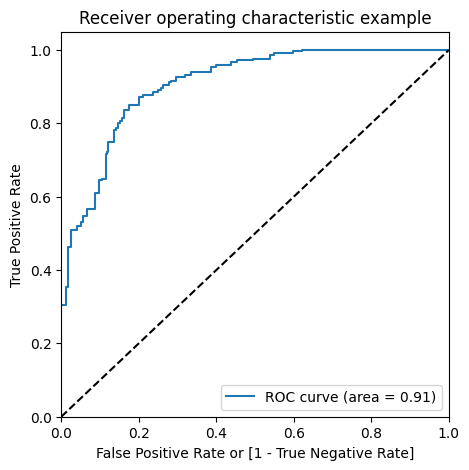

In [ ]:
draw_roc(y_train_pred_final4.Target, y_train_pred_final4.Target_prob)

In [ ]:
#finding optimal cut off point
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final4[i]= y_train_pred_final.Target_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final4.head()

Target  Target_prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0       1     0.408168          0    1    1    1    1    1    0    0    0   
1       0     0.039535          0    1    0    0    0    0    0    0    0   
2       0     0.016047          0    1    0    0    0    0    0    0    0   
3       1     0.753130          1    1    1    1    1    1    1    1    1   
4       0     0.829638          1    1    1    1    1    1    1    1    1   

   0.8  0.9  
0    0    0  
1    0    0  
2    0    0  
3    0    0  
4    1    0

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final4.Target, y_train_pred_final4[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.499303  1.000000  0.000000
0.1   0.1  0.737796  0.986034  0.490251
0.2   0.2  0.776848  0.952514  0.601671
0.3   0.3  0.796374  0.918994  0.674095
0.4   0.4  0.832636  0.918994  0.746518
0.5   0.5  0.834031  0.874302  0.793872
0.6   0.6  0.834031  0.807263  0.860724
0.7   0.7  0.792190  0.689944  0.894150
0.8   0.8  0.755927  0.555866  0.955432
0.9   0.9  0.686192  0.382682  0.988858


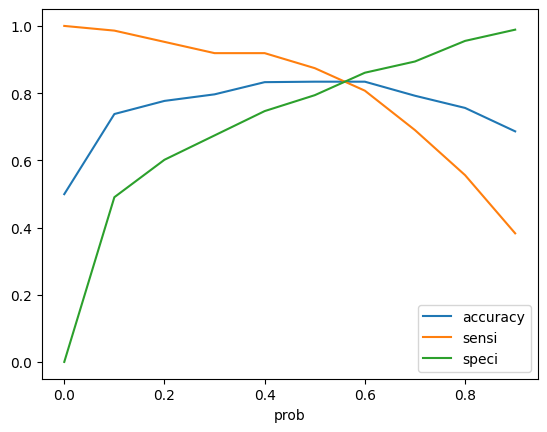

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
y_train_pred_final4['final_predicted'] = y_train_pred_final4.Target_prob.map( lambda x: 1 if x > 0.59 else 0)

y_train_pred_final4.head()

Target  Target_prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0       1     0.408168          0    1    1    1    1    1    0    0    0   
1       0     0.039535          0    1    0    0    0    0    0    0    0   
2       0     0.016047          0    1    0    0    0    0    0    0    0   
3       1     0.753130          1    1    1    1    1    1    1    1    1   
4       0     0.829638          1    1    1    1    1    1    1    1    1   

   0.8  0.9  final_predicted  
0    0    0                0  
1    0    0                0  
2    0    0                0  
3    0    0                1  
4    1    0                1

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final4.Target, y_train_pred_final4.final_predicted)

0.8200836820083682

There is hardly any difference , previously it was 0.83 and now 0.82. we can use this one. The accuracy for test data is 82%

---



---



**Use test data**

In [ ]:
#Import RFE and select 15 variables
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming logreg is your logistic regression model
logreg = LogisticRegression()

# Specify the number of features to select (15 in this case)
num_features_to_select = 15

# Initialize RFE
rfe = RFE(logreg, n_features_to_select=num_features_to_select)

# Fit RFE on your training data
rfe.fit(x_test, y_test)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [ ]:
# Let's take a look at which features have been selected by RFE
list(zip(x_test.columns, rfe.support_, rfe.ranking_))

[('age', True, 1),
 ('sex', True, 1),
 ('cp', True, 1),
 ('trestbps', True, 1),
 ('chol', True, 1),
 ('fbs', True, 1),
 ('restecg', True, 1),
 ('thalach', True, 1),
 ('exang', True, 1),
 ('oldpeak', True, 1),
 ('slope', True, 1),
 ('ca', True, 1),
 ('thal', True, 1)]

In [ ]:
col = x_test.columns[rfe.support_]

In [ ]:
x_test=x_test[col]

In [ ]:
import statsmodels.api as sm

In [ ]:
#assessing with stat model
x_test_sm = sm.add_constant(x_test)
logm5 = sm.GLM(y_test,x_test_sm, family = sm.families.Binomial())
res5 = logm5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  308
Model:                            GLM   Df Residuals:                      294
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -91.890
Date:                Tue, 30 Apr 2024   Deviance:                       183.78
Time:                        14:07:09   Pearson chi2:                     261.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5422
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8073      1.863      0.970      0.332      -1.843       5.458
age            0.8195      1.260      0.650      0.516      -1.651       3.290
sex           -2.5197      0.575     -4.380      0.000      -3.647      -1.392
cp             1.3542      0.245      5.533      0.000       0.874       1.834
trestbps      -4.2757      1.356     -3.154      0.002      -6.933      -1.619
chol          -2.2883      1.328     -1.723      0.085      -4.891       0.315
fbs           -0.7857      0.605     -1.299      0.194      -1.971       0.400
restecg        0.1385      0.388      0.357      0.721      -0.621       0.898
thalach        4.3229      1.510      2.862      0.004       1.363       7.283
exang         -1.0062      0.472     -2.130      0.033      -1.932      -0.080
oldpeak       -0.5802      0.248     -2.341      0.019      -1.066      -0.095
slope          0.3876      0.421      0.921      0.357      -0.438       1.213
ca            -1.3528      0.278     -4.860      0.000      -1.898      -0.807
thal          -0.1892      0.726     -0.261      0.794      -1.612       1.233
==============================================================================
"""

In [ ]:
#checking VIF
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_test[col].columns
vif['VIF'] = [variance_inflation_factor(x_test[col].values, i) for i in range(x_test[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
12      thal  26.70
7    thalach  15.38
10     slope  11.31
0        age  10.67
4       chol   8.31
3   trestbps   6.61
1        sex   3.55
9    oldpeak   2.98
2         cp   2.54
8      exang   2.27
6    restecg   2.08
11        ca   2.02
5        fbs   1.40

In [ ]:
#x_test.drop("What is your current occupation_Missing", axis=1, inplace=True)
col = col.drop('thalach', 1)
col = col.drop('thal', 1)

In [ ]:
# Let's re-run the model using the selected variables
x_test_sm = sm.add_constant(x_test[col])
logm6 = sm.GLM(y_test,x_test_sm, family = sm.families.Binomial())
res6 = logm6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  308
Model:                            GLM   Df Residuals:                      296
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -96.280
Date:                Tue, 30 Apr 2024   Deviance:                       192.56
Time:                        14:07:09   Pearson chi2:                     251.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5290
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4158      1.191      2.867      0.004       1.081       5.751
age           -0.6790      1.112     -0.611      0.541      -2.859       1.500
sex           -2.1370      0.532     -4.020      0.000      -3.179      -1.095
cp             1.3992      0.235      5.942      0.000       0.938       1.861
trestbps      -3.4151      1.296     -2.636      0.008      -5.954      -0.876
chol          -1.3709      1.223     -1.121      0.262      -3.769       1.027
fbs           -0.7047      0.545     -1.292      0.196      -1.774       0.364
restecg        0.1972      0.370      0.533      0.594      -0.528       0.923
exang         -1.3218      0.440     -3.003      0.003      -2.185      -0.459
oldpeak       -0.6449      0.236     -2.736      0.006      -1.107      -0.183
slope          0.6713      0.376      1.787      0.074      -0.065       1.408
ca            -1.4048      0.275     -5.112      0.000      -1.943      -0.866
==============================================================================
"""

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
# Assuming x_test[col] is your DataFrame
vif = pd.DataFrame()
vif['Features'] = x_test[col].columns
vif['VIF'] = [variance_inflation_factor(x_test[col].values, i) for i in range(x_test[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features   VIF
0        age  9.30
4       chol  7.45
9      slope  7.08
3   trestbps  6.07
1        sex  3.26
8    oldpeak  2.73
2         cp  2.39
7      exang  2.18
6    restecg  2.03
10        ca  1.92
5        fbs  1.35

In [ ]:
# Assuming df is your DataFrame containing the data
col = col.drop('trestbps', 1)


In [ ]:
# Let's re-run the model using the selected variables
x_test_sm = sm.add_constant(x_test[col])
logm7 = sm.GLM(y_test,x_test_sm, family = sm.families.Binomial())
res7 = logm7.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  308
Model:                            GLM   Df Residuals:                      297
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -100.05
Date:                Tue, 30 Apr 2024   Deviance:                       200.10
Time:                        14:07:09   Pearson chi2:                     311.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5173
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6313      1.092      2.410      0.016       0.492       4.771
age           -1.4081      1.081     -1.303      0.193      -3.526       0.710
sex           -1.8506      0.485     -3.816      0.000      -2.801      -0.900
cp             1.3064      0.223      5.857      0.000       0.869       1.744
chol          -1.4942      1.178     -1.269      0.205      -3.803       0.814
fbs           -0.7177      0.544     -1.319      0.187      -1.785       0.349
restecg        0.1719      0.362      0.475      0.635      -0.537       0.881
exang         -1.3769      0.416     -3.307      0.001      -2.193      -0.561
oldpeak       -0.6705      0.229     -2.927      0.003      -1.120      -0.222
slope          0.6165      0.366      1.684      0.092      -0.101       1.334
ca            -1.3334      0.269     -4.966      0.000      -1.860      -0.807
==============================================================================
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = x_test[col].columns
vif['VIF'] = [variance_inflation_factor(x_test[col].values, i) for i in range(x_test[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0      age  8.22
3     chol  7.19
8    slope  7.00
1      sex  3.25
7  oldpeak  2.63
2       cp  2.34
6    exang  2.15
5  restecg  2.03
9       ca  1.92
4      fbs  1.32

In [ ]:
# Getting the predicted values on the train set
y_test_pred = res7.predict(x_test_sm)
y_test_pred[:10]

960    0.991503
48     0.934716
886    0.005586
981    0.498404
973    0.605071
671    0.093821
345    0.014731
61     0.934716
993    0.003029
939    0.967547
dtype: float64

In [ ]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.99150323, 0.93471625, 0.00558602, 0.4984038 , 0.60507149,
       0.09382079, 0.01473062, 0.93471625, 0.00302885, 0.96754716])

In [ ]:
#creating a dataframe with conversion flag n predicted probability
y_test_pred_final = pd.DataFrame({'Target':y_test.values, 'Target_prob':y_test_pred})
y_test_pred_final['CustID'] = y_test.index
y_test_pred_final.head()

Target  Target_prob  CustID
0       1     0.991503     960
1       1     0.934716      48
2       0     0.005586     886
3       0     0.498404     981
4       1     0.605071     973

In [ ]:
y_test_pred_final['predicted'] = y_test_pred_final.Target_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_test_pred_final.head()

Target  Target_prob  CustID  predicted
0       1     0.991503     960          1
1       1     0.934716      48          1
2       0     0.005586     886          0
3       0     0.498404     981          0
4       1     0.605071     973          1

In [ ]:
from sklearn import metrics

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final.Target, y_test_pred_final.predicted)
print(confusion)

[[118  22]
 [ 13 155]]


In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_test_pred_final.Target, y_test_pred_final.predicted))

0.8863636363636364


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9226190476190477

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8428571428571429

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.15714285714285714


In [ ]:
# Positive predictive value
print (TP / float(TP+FP))

0.8757062146892656


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9007633587786259


In [ ]:
#plotting ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_pred_final.Target, y_test_pred_final.Target_prob, drop_intermediate = False )

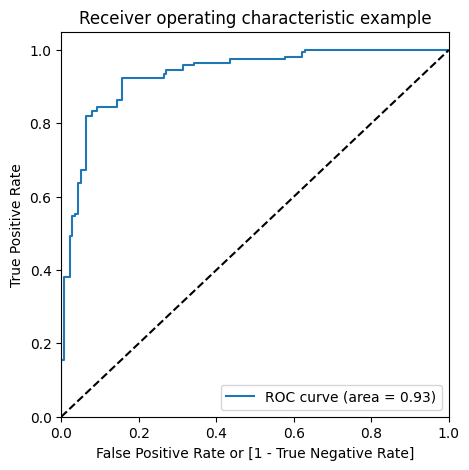

In [ ]:
draw_roc(y_test_pred_final.Target, y_test_pred_final.Target_prob)

In [ ]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_final[i]= y_test_pred_final.Target_prob.map(lambda x: 1 if x > i else 0)
y_test_pred_final.head()

Target  Target_prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0       1     0.991503     960          1    1    1    1    1    1    1    1   
1       1     0.934716      48          1    1    1    1    1    1    1    1   
2       0     0.005586     886          0    1    0    0    0    0    0    0   
3       0     0.498404     981          0    1    1    1    1    1    0    0   
4       1     0.605071     973          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    1    1    1  
1    1    1    1  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [ ]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_pred_final.Target, y_test_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.545455  1.000000  0.000000
0.1   0.1  0.785714  0.976190  0.557143
0.2   0.2  0.821429  0.958333  0.657143
0.3   0.3  0.831169  0.952381  0.685714
0.4   0.4  0.840909  0.928571  0.735714
0.5   0.5  0.886364  0.922619  0.842857
0.6   0.6  0.857143  0.857143  0.857143
0.7   0.7  0.863636  0.803571  0.935714
0.8   0.8  0.798701  0.672619  0.950000
0.9   0.9  0.714286  0.500000  0.971429


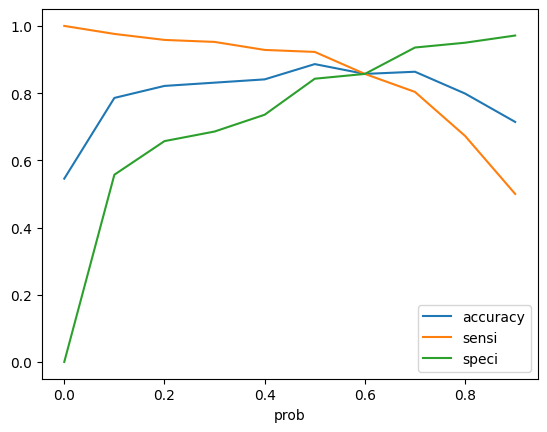

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Target_prob.map( lambda x: 1 if x > 0.6 else 0)

y_test_pred_final.head()

Target  Target_prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0       1     0.991503     960          1    1    1    1    1    1    1    1   
1       1     0.934716      48          1    1    1    1    1    1    1    1   
2       0     0.005586     886          0    1    0    0    0    0    0    0   
3       0     0.498404     981          0    1    1    1    1    1    0    0   
4       1     0.605071     973          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    1    1    1                1  
1    1    1    1                1  
2    0    0    0                0  
3    0    0    0                0  
4    0    0    0                1

In [ ]:
from sklearn import metrics

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Target, y_test_pred_final.final_predicted)

0.8571428571428571

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

1. top features for test are: sex, oldpeak, cp	, exang, ca	, fbs
2. top features for train are: cp	, restecg	, exang	, ca	, fbs...
we can conclude ca, fbs and exang are the top features for the target column



**The accuracy for train data is 82.4% whereas for test data it it is 85%**